# Khai Th√°c D·ªØ Li·ªáu - C√°c Thu·∫≠t To√°n C∆° B·∫£n

Notebook n√†y bao g·ªìm c√°c thu·∫≠t to√°n khai th√°c d·ªØ li·ªáu quan tr·ªçng:

1. **Apriori** - Thu·∫≠t to√°n khai th√°c lu·∫≠t k·∫øt h·ª£p (Association Rule Learning)
2. **Rough Set Reduction** - Gi·∫£m chi·ªÅu kh√¥ng m·∫•t th√¥ng tin b·∫±ng l√Ω thuy·∫øt t·∫≠p m·ªù th√¥
3. **Naive Bayes** - Ph√¢n lo·∫°i theo x√°c su·∫•t Bayes v·ªõi gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p
4. **Decision Tree C4.5** - Thu·∫≠t to√°n c√¢y quy·∫øt ƒë·ªãnh c·ªßa Quinlan
5. **Decision Tree ID3** - Iterative Dichotomiser 3
6. **Decision Tree CART** - Classification and Regression Trees
7. **K-means** - Ph√¢n c·ª•m kh√¥ng gi√°m s√°t (Unsupervised Clustering)

M·ªói thu·∫≠t to√°n s·∫Ω c√≥:
- Code Python implementation
- Dataset demo
- Giao di·ªán t∆∞∆°ng t√°c
- Visualization k·∫øt qu·∫£


In [1]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import itertools
import warnings
warnings.filterwarnings('ignore')

# C·∫•u h√¨nh matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("‚úÖ ƒê√£ import th√†nh c√¥ng t·∫•t c·∫£ th∆∞ vi·ªán c·∫ßn thi·∫øt!")


‚úÖ ƒê√£ import th√†nh c√¥ng t·∫•t c·∫£ th∆∞ vi·ªán c·∫ßn thi·∫øt!


## 1. Thu·∫≠t To√°n Apriori - Association Rule Learning


In [2]:
# Implementation thu·∫≠t to√°n Apriori
print("=== B√ÄI 1: THU·∫¨T TO√ÅN APRIORI ===")
print("Thu·∫≠t to√°n Apriori ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√¨m c√°c lu·∫≠t k·∫øt h·ª£p trong d·ªØ li·ªáu giao d·ªãch.")
print("Nguy√™n l√Ω: N·∫øu m·ªôt itemset l√† frequent, th√¨ t·∫•t c·∫£ c√°c subset c·ªßa n√≥ c≈©ng l√† frequent")
print()

class AprioriAlgorithm:
    """
    Thu·∫≠t to√°n Apriori ƒë·ªÉ t√¨m frequent itemsets v√† association rules
    """
    
    def __init__(self, min_support=0.1, min_confidence=0.5):
        """
        Kh·ªüi t·∫°o thu·∫≠t to√°n Apriori
        
        Parameters:
        min_support (float): Ng∆∞·ª°ng support t·ªëi thi·ªÉu (0.0 - 1.0)
        min_confidence (float): Ng∆∞·ª°ng confidence t·ªëi thi·ªÉu (0.0 - 1.0)
        """
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.frequent_itemsets = {}
        self.association_rules = []
        self.transaction_list = []
        
    def _get_support_count(self, itemset):
        """T√≠nh s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa itemset trong transactions"""
        count = 0
        for transaction in self.transaction_list:
            if itemset.issubset(transaction):
                count += 1
        return count
    
    def _get_support(self, itemset):
        """T√≠nh support c·ªßa itemset (t·ª∑ l·ªá xu·∫•t hi·ªán)"""
        if len(self.transaction_list) == 0:
            return 0
        return self._get_support_count(itemset) / len(self.transaction_list)
    
    def _generate_candidates(self, frequent_itemsets_k_1):
        """
        T·∫°o candidate k-itemsets t·ª´ frequent (k-1)-itemsets
        
        Parameters:
        frequent_itemsets_k_1 (dict): Frequent (k-1)-itemsets
        
        Returns:
        set: C√°c candidate k-itemsets
        """
        candidates = set()
        itemsets = list(frequent_itemsets_k_1.keys())
        
        # T·∫°o candidates b·∫±ng c√°ch k·∫øt h·ª£p 2 itemsets c√≥ (k-2) items gi·ªëng nhau
        for i in range(len(itemsets)):
            for j in range(i + 1, len(itemsets)):
                # Union hai itemsets
                candidate = itemsets[i].union(itemsets[j])
                
                # Ki·ªÉm tra n·∫øu candidate c√≥ ƒë√∫ng k items
                if len(candidate) == len(itemsets[i]) + 1:
                    # Ki·ªÉm tra t·∫•t c·∫£ subsets c·ªßa candidate c√≥ frequent kh√¥ng
                    is_valid = True
                    for item in candidate:
                        subset = candidate - {item}
                        if subset not in frequent_itemsets_k_1:
                            is_valid = False
                            break
                    
                    if is_valid:
                        candidates.add(candidate)
        
        return candidates
    
    def find_frequent_itemsets(self, transactions):
        """
        T√¨m t·∫•t c·∫£ frequent itemsets t·ª´ transactions
        
        Parameters:
        transactions (list): Danh s√°ch c√°c giao d·ªãch
        
        Returns:
        dict: Frequent itemsets ƒë∆∞·ª£c nh√≥m theo k√≠ch th∆∞·ªõc
        """
        # Chuy·ªÉn ƒë·ªïi transactions th√†nh list of sets
        self.transaction_list = [set(transaction) for transaction in transactions]
        self.frequent_itemsets = {}
        
        print(f"üìä ƒêang x·ª≠ l√Ω {len(self.transaction_list)} giao d·ªãch...")
        print(f"üéØ Min support: {self.min_support}")
        
        # B∆∞·ªõc 1: T√¨m frequent 1-itemsets
        print("\nüîç B∆∞·ªõc 1: T√¨m frequent 1-itemsets...")
        item_counts = defaultdict(int)
        
        # ƒê·∫øm s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa m·ªói item
        for transaction in self.transaction_list:
            for item in transaction:
                item_counts[item] += 1
        
        # T√≠nh min_support_count
        min_support_count = self.min_support * len(self.transaction_list)
        print(f"   Min support count: {min_support_count}")
        
        # L·ªçc frequent 1-itemsets
        frequent_1_itemsets = {}
        for item, count in item_counts.items():
            if count >= min_support_count:
                frequent_1_itemsets[frozenset([item])] = count
                print(f"   ‚úÖ {item}: {count} l·∫ßn (support: {count/len(self.transaction_list):.3f})")
        
        self.frequent_itemsets[1] = frequent_1_itemsets
        
        if not frequent_1_itemsets:
            print("   ‚ùå Kh√¥ng t√¨m th·∫•y frequent 1-itemsets n√†o!")
            return self.frequent_itemsets
        
        # B∆∞·ªõc 2: T√¨m frequent k-itemsets (k > 1)
        k = 2
        while k-1 in self.frequent_itemsets and len(self.frequent_itemsets[k-1]) > 0:
            print(f"\nüîç B∆∞·ªõc {k}: T√¨m frequent {k}-itemsets...")
            
            # T·∫°o candidate k-itemsets
            candidates = self._generate_candidates(self.frequent_itemsets[k-1])
            print(f"   T·∫°o ƒë∆∞·ª£c {len(candidates)} candidates")
            
            if not candidates:
                print("   ‚ùå Kh√¥ng c√≥ candidates n√†o, d·ª´ng thu·∫≠t to√°n")
                break
            
            # ƒê·∫øm support cho candidates
            candidate_counts = {}
            for candidate in candidates:
                count = self._get_support_count(candidate)
                if count >= min_support_count:
                    candidate_counts[candidate] = count
            
            # L∆∞u frequent k-itemsets
            self.frequent_itemsets[k] = candidate_counts
            
            if candidate_counts:
                print(f"   ‚úÖ T√¨m th·∫•y {len(candidate_counts)} frequent {k}-itemsets:")
                for itemset, count in candidate_counts.items():
                    support = count / len(self.transaction_list)
                    print(f"      {set(itemset)}: {count} l·∫ßn (support: {support:.3f})")
            else:
                print(f"   ‚ùå Kh√¥ng c√≥ frequent {k}-itemsets n√†o")
                break
            
            k += 1
        
        print(f"\nüéâ Ho√†n th√†nh! T√¨m th·∫•y frequent itemsets t·ª´ k=1 ƒë·∫øn k={k-1}")
        return self.frequent_itemsets
    
    def generate_association_rules(self):
        """
        T·∫°o association rules t·ª´ frequent itemsets
        
        Returns:
        list: Danh s√°ch c√°c association rules
        """
        print("\nüîó T·∫°o association rules...")
        rules = []
        
        if not self.frequent_itemsets or len(self.frequent_itemsets) < 2:
            print("   ‚ùå Kh√¥ng ƒë·ªß frequent itemsets ƒë·ªÉ t·∫°o rules")
            return rules
        
        # Duy·ªát qua t·∫•t c·∫£ frequent itemsets c√≥ k >= 2
        for k in range(2, len(self.frequent_itemsets) + 1):
            if k not in self.frequent_itemsets:
                continue
                
            print(f"   üìã X·ª≠ l√Ω {k}-itemsets...")
            
            for itemset in self.frequent_itemsets[k]:
                # T·∫°o t·∫•t c·∫£ possible rules t·ª´ itemset
                for item in itemset:
                    antecedent = itemset - {item}
                    consequent = {item}
                    
                    # T√≠nh confidence
                    antecedent_support = self._get_support_count(antecedent)
                    itemset_support = self._get_support_count(itemset)
                    
                    if antecedent_support > 0:
                        confidence = itemset_support / antecedent_support
                        
                        if confidence >= self.min_confidence:
                            consequent_support = self._get_support_count(consequent)
                            lift = confidence / (consequent_support / len(self.transaction_list)) if consequent_support > 0 else 0
                            
                            rule = {
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemset_support / len(self.transaction_list),
                                'confidence': confidence,
                                'lift': lift
                            }
                            rules.append(rule)
        
        self.association_rules = rules
        print(f"   ‚úÖ T·∫°o ƒë∆∞·ª£c {len(rules)} association rules")
        return rules
    
    def print_results(self):
        """In k·∫øt qu·∫£ frequent itemsets v√† association rules"""
        print("\n" + "="*60)
        print("üìä K·∫æT QU·∫¢ FREQUENT ITEMSETS")
        print("="*60)
        
        if not self.frequent_itemsets:
            print("‚ùå Kh√¥ng t√¨m th·∫•y frequent itemsets n√†o!")
            return
        
        total_frequent = 0
        for k, itemsets in self.frequent_itemsets.items():
            if itemsets:
                total_frequent += len(itemsets)
                print(f"\nüî∏ Frequent {k}-itemsets ({len(itemsets)} itemsets):")
                for itemset, count in itemsets.items():
                    support = count / len(self.transaction_list)
                    print(f"   {set(itemset)}: {count} l·∫ßn (support: {support:.3f})")
        
        print(f"\nüìà T·ªïng c·ªông: {total_frequent} frequent itemsets")
        
        print("\n" + "="*60)
        print("üîó K·∫æT QU·∫¢ ASSOCIATION RULES")
        print("="*60)
        
        if not self.association_rules:
            print("‚ùå Kh√¥ng t√¨m th·∫•y association rules n√†o!")
        else:
            print(f"üìã T√¨m th·∫•y {len(self.association_rules)} association rules:")
            print(f"üéØ Min confidence: {self.min_confidence}")
            
            for i, rule in enumerate(self.association_rules, 1):
                antecedent_str = ', '.join(sorted(list(rule['antecedent'])))
                consequent_str = ', '.join(sorted(list(rule['consequent'])))
                
                print(f"\n{i}. {antecedent_str} ‚Üí {consequent_str}")
                print(f"   Support: {rule['support']:.3f}")
                print(f"   Confidence: {rule['confidence']:.3f}")
                print(f"   Lift: {rule['lift']:.3f}")

print("‚úÖ ƒê√£ ƒë·ªãnh nghƒ©a class AprioriAlgorithm!")

# Dataset demo cho thu·∫≠t to√°n Apriori
def create_demo_transactions():
    """T·∫°o dataset demo cho thu·∫≠t to√°n Apriori"""
    transactions = [
        ['bread', 'milk'],
        ['bread', 'diaper', 'beer', 'eggs'],
        ['milk', 'diaper', 'beer', 'cola'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'cola'],
        ['milk', 'diaper', 'beer'],
        ['bread', 'milk', 'beer'],
        ['bread', 'diaper', 'beer'],
        ['milk', 'diaper', 'cola'],
        ['bread', 'milk', 'diaper']
    ]
    return transactions

def create_larger_demo_transactions():
    """T·∫°o dataset demo l·ªõn h∆°n ƒë·ªÉ test hi·ªáu su·∫•t"""
    transactions = [
        ['bread', 'milk', 'cheese'],
        ['bread', 'butter', 'jam'],
        ['milk', 'cereal', 'banana'],
        ['bread', 'milk', 'eggs'],
        ['butter', 'jam', 'tea'],
        ['milk', 'cereal', 'sugar'],
        ['bread', 'cheese', 'wine'],
        ['milk', 'butter', 'eggs'],
        ['bread', 'milk', 'butter'],
        ['cereal', 'milk', 'banana'],
        ['bread', 'jam', 'coffee'],
        ['milk', 'cheese', 'crackers'],
        ['bread', 'butter', 'milk'],
        ['cereal', 'sugar', 'milk'],
        ['bread', 'eggs', 'milk']
    ]
    return transactions

# Hi·ªÉn th·ªã dataset demo
print("\nüõí DATASET DEMO CHO THU·∫¨T TO√ÅN APRIORI")
print("="*50)

transactions = create_demo_transactions()
print("üìã Dataset giao d·ªãch (10 giao d·ªãch):")
for i, transaction in enumerate(transactions, 1):
    print(f"   Giao d·ªãch {i:2d}: {transaction}")

print(f"\nüìä Th·ªëng k√™:")
print(f"   ‚Ä¢ T·ªïng s·ªë giao d·ªãch: {len(transactions)}")
print(f"   ‚Ä¢ S·ªë items kh√°c nhau: {len(set(item for transaction in transactions for item in transaction))}")
print(f"   ‚Ä¢ Items: {sorted(set(item for transaction in transactions for item in transaction))}")

# Th·ªëng k√™ chi ti·∫øt
item_counts = {}
for transaction in transactions:
    for item in transaction:
        item_counts[item] = item_counts.get(item, 0) + 1

print(f"\nüìà S·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa t·ª´ng item:")
for item, count in sorted(item_counts.items(), key=lambda x: x[1], reverse=True):
    support = count / len(transactions)
    print(f"   ‚Ä¢ {item:8s}: {count:2d} l·∫ßn (support: {support:.2f})")

# Demo 1: Test v·ªõi min_support = 0.3, min_confidence = 0.6
print("\nüöÄ DEMO 1: THU·∫¨T TO√ÅN APRIORI")
print("="*60)
print("üìã Tham s·ªë:")
print("   ‚Ä¢ Min support: 0.3")
print("   ‚Ä¢ Min confidence: 0.6")
print("   ‚Ä¢ Dataset: 10 giao d·ªãch")

# Kh·ªüi t·∫°o v√† ch·∫°y thu·∫≠t to√°n
apriori = AprioriAlgorithm(min_support=0.3, min_confidence=0.6)
frequent_itemsets = apriori.find_frequent_itemsets(transactions)
association_rules = apriori.generate_association_rules()
apriori.print_results()

print("\n‚úÖ HO√ÄN TH√ÄNH B√ÄI 1: THU·∫¨T TO√ÅN APRIORI!")


=== B√ÄI 1: THU·∫¨T TO√ÅN APRIORI ===
Thu·∫≠t to√°n Apriori ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√¨m c√°c lu·∫≠t k·∫øt h·ª£p trong d·ªØ li·ªáu giao d·ªãch.
Nguy√™n l√Ω: N·∫øu m·ªôt itemset l√† frequent, th√¨ t·∫•t c·∫£ c√°c subset c·ªßa n√≥ c≈©ng l√† frequent

‚úÖ ƒê√£ ƒë·ªãnh nghƒ©a class AprioriAlgorithm!

üõí DATASET DEMO CHO THU·∫¨T TO√ÅN APRIORI
üìã Dataset giao d·ªãch (10 giao d·ªãch):
   Giao d·ªãch  1: ['bread', 'milk']
   Giao d·ªãch  2: ['bread', 'diaper', 'beer', 'eggs']
   Giao d·ªãch  3: ['milk', 'diaper', 'beer', 'cola']
   Giao d·ªãch  4: ['bread', 'milk', 'diaper', 'beer']
   Giao d·ªãch  5: ['bread', 'milk', 'diaper', 'cola']
   Giao d·ªãch  6: ['milk', 'diaper', 'beer']
   Giao d·ªãch  7: ['bread', 'milk', 'beer']
   Giao d·ªãch  8: ['bread', 'diaper', 'beer']
   Giao d·ªãch  9: ['milk', 'diaper', 'cola']
   Giao d·ªãch 10: ['bread', 'milk', 'diaper']

üìä Th·ªëng k√™:
   ‚Ä¢ T·ªïng s·ªë giao d·ªãch: 10
   ‚Ä¢ S·ªë items kh√°c nhau: 6
   ‚Ä¢ Items: ['beer', 'bread', 'cola',

## 2. Rough Set Reduction - Gi·∫£m Chi·ªÅu D·ªØ Li·ªáu

Rough Set Theory ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu m√† kh√¥ng m·∫•t th√¥ng tin quan tr·ªçng. N√≥ t√¨m ra c√°c thu·ªôc t√≠nh c·∫ßn thi·∫øt (reduct) ƒë·ªÉ ph√¢n lo·∫°i d·ªØ li·ªáu.


In [3]:
# Implementation Rough Set Reduction
class RoughSetReduction:
    def __init__(self):
        self.decision_table = None
        self.condition_attributes = None
        self.decision_attribute = None
        self.reducts = []
    
    def load_data(self, data, condition_attrs, decision_attr):
        """Load d·ªØ li·ªáu v√† x√°c ƒë·ªãnh thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán v√† quy·∫øt ƒë·ªãnh"""
        self.decision_table = data.copy()
        self.condition_attributes = condition_attrs
        self.decision_attribute = decision_attr
    
    def get_indiscernibility_relation(self, attributes):
        """T√≠nh quan h·ªá kh√¥ng ph√¢n bi·ªát ƒë∆∞·ª£c cho t·∫≠p thu·ªôc t√≠nh"""
        equivalence_classes = {}
        
        for idx, row in self.decision_table.iterrows():
            # T·∫°o key t·ª´ gi√° tr·ªã c·ªßa c√°c thu·ªôc t√≠nh
            key = tuple(row[attr] for attr in attributes)
            
            if key not in equivalence_classes:
                equivalence_classes[key] = []
            equivalence_classes[key].append(idx)
        
        return list(equivalence_classes.values())
    
    def get_lower_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ d∆∞·ªõi"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        lower_approx = set()
        
        for eq_class in equivalence_classes:
            if set(eq_class).issubset(X):
                lower_approx.update(eq_class)
        
        return lower_approx
    
    def get_upper_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ tr√™n"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        upper_approx = set()
        
        for eq_class in equivalence_classes:
            if len(set(eq_class).intersection(X)) > 0:
                upper_approx.update(eq_class)
        
        return upper_approx
    
    def get_positive_region(self, attributes):
        """T√≠nh v√πng d∆∞∆°ng"""
        decision_classes = self.get_indiscernibility_relation([self.decision_attribute])
        positive_region = set()
        
        for decision_class in decision_classes:
            lower_approx = self.get_lower_approximation(set(decision_class), attributes)
            positive_region.update(lower_approx)
        
        return positive_region
    
    def calculate_dependency(self, attributes):
        """T√≠nh ƒë·ªô ph·ª• thu·ªôc"""
        positive_region = self.get_positive_region(attributes)
        total_objects = len(self.decision_table)
        
        return len(positive_region) / total_objects if total_objects > 0 else 0
    
    def is_reduct(self, attributes):
        """Ki·ªÉm tra xem t·∫≠p thu·ªôc t√≠nh c√≥ ph·∫£i l√† reduct kh√¥ng"""
        # Ki·ªÉm tra t√≠nh ƒë·∫ßy ƒë·ªß
        if self.calculate_dependency(attributes) != self.calculate_dependency(self.condition_attributes):
            return False
        
        # Ki·ªÉm tra t√≠nh t·ªëi thi·ªÉu
        for attr in attributes:
            remaining_attrs = [a for a in attributes if a != attr]
            if self.calculate_dependency(remaining_attrs) == self.calculate_dependency(self.condition_attributes):
                return False
        
        return True
    
    def find_reducts(self):
        """T√¨m t·∫•t c·∫£ reducts"""
        self.reducts = []
        n = len(self.condition_attributes)
        
        # Th·ª≠ t·∫•t c·∫£ c√°c t·∫≠p con c√≥ th·ªÉ
        for i in range(1, 2**n):
            subset = []
            for j in range(n):
                if i & (1 << j):
                    subset.append(self.condition_attributes[j])
            
            if self.is_reduct(subset):
                self.reducts.append(subset)
        
        return self.reducts
    
    def find_minimal_reduct(self):
        """T√¨m reduct c√≥ k√≠ch th∆∞·ªõc nh·ªè nh·∫•t"""
        if not self.reducts:
            self.find_reducts()
        
        if not self.reducts:
            return None
        
        min_length = min(len(reduct) for reduct in self.reducts)
        minimal_reducts = [reduct for reduct in self.reducts if len(reduct) == min_length]
        
        return minimal_reducts[0] if minimal_reducts else None
    
    def print_results(self):
        """In k·∫øt qu·∫£"""
        print("=== ROUGH SET REDUCTION RESULTS ===")
        print(f"Thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán: {self.condition_attributes}")
        print(f"Thu·ªôc t√≠nh quy·∫øt ƒë·ªãnh: {self.decision_attribute}")
        print(f"ƒê·ªô ph·ª• thu·ªôc ban ƒë·∫ßu: {self.calculate_dependency(self.condition_attributes):.3f}")
        
        print(f"\nT√¨m th·∫•y {len(self.reducts)} reduct(s):")
        for i, reduct in enumerate(self.reducts, 1):
            print(f"  Reduct {i}: {reduct}")
            print(f"    ƒê·ªô ph·ª• thu·ªôc: {self.calculate_dependency(reduct):.3f}")
        
        minimal_reduct = self.find_minimal_reduct()
        if minimal_reduct:
            print(f"\nReduct t·ªëi thi·ªÉu: {minimal_reduct}")

# T·∫°o dataset demo cho Rough Set
def create_demo_rough_set_data():
    """T·∫°o dataset demo cho Rough Set Reduction"""
    data = {
        'Temperature': ['High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low'],
        'Humidity': ['High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak'],
        'Outlook': ['Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
    }
    return pd.DataFrame(data)

# Demo Rough Set Reduction
print("=== DEMO ROUGH SET REDUCTION ===")
data = create_demo_rough_set_data()
print("Dataset:")
print(data)

rough_set = RoughSetReduction()
condition_attrs = ['Temperature', 'Humidity', 'Wind', 'Outlook']
decision_attr = 'Play'

rough_set.load_data(data, condition_attrs, decision_attr)
reducts = rough_set.find_reducts()
rough_set.print_results()


=== DEMO ROUGH SET REDUCTION ===
Dataset:
  Temperature Humidity    Wind Outlook Play
0        High     High    Weak   Sunny   No
1        High     High  Strong   Sunny   No
2         Low     High    Weak   Rainy  Yes
3         Low      Low    Weak   Rainy  Yes
4        High     High    Weak   Sunny   No
5         Low      Low  Strong   Rainy  Yes
6        High      Low  Strong   Sunny   No
7         Low      Low    Weak   Rainy  Yes
=== ROUGH SET REDUCTION RESULTS ===
Thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán: ['Temperature', 'Humidity', 'Wind', 'Outlook']
Thu·ªôc t√≠nh quy·∫øt ƒë·ªãnh: Play
ƒê·ªô ph·ª• thu·ªôc ban ƒë·∫ßu: 1.000

T√¨m th·∫•y 2 reduct(s):
  Reduct 1: ['Temperature']
    ƒê·ªô ph·ª• thu·ªôc: 1.000
  Reduct 2: ['Outlook']
    ƒê·ªô ph·ª• thu·ªôc: 1.000

Reduct t·ªëi thi·ªÉu: ['Temperature']


## 3. Naive Bayes Classifier

Naive Bayes l√† thu·∫≠t to√°n ph√¢n lo·∫°i d·ª±a tr√™n ƒë·ªãnh l√Ω Bayes v·ªõi gi·∫£ ƒë·ªãnh r·∫±ng c√°c thu·ªôc t√≠nh ƒë·ªôc l·∫≠p v·ªõi nhau. N√≥ t√≠nh x√°c su·∫•t h·∫≠u nghi·ªám ƒë·ªÉ ph√¢n lo·∫°i d·ªØ li·ªáu m·ªõi.


In [4]:
# Implementation Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_probs = {}
        self.feature_probs = {}
        self.is_fitted = False
    
    def fit(self, X, y):
        """Hu·∫•n luy·ªán m√¥ h√¨nh Naive Bayes"""
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói class
        for class_label in self.classes:
            class_mask = (y == class_label)
            self.class_probs[class_label] = np.sum(class_mask) / n_samples
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói feature cho m·ªói class
        self.feature_probs = {}
        for class_label in self.classes:
            class_mask = (y == class_label)
            class_data = X[class_mask]
            
            self.feature_probs[class_label] = {}
            for feature_idx in range(n_features):
                feature_values = class_data[:, feature_idx]
                
                # S·ª≠ d·ª•ng Gaussian distribution cho continuous features
                mean_val = np.mean(feature_values)
                std_val = np.std(feature_values)
                
                # Tr√°nh std = 0
                if std_val == 0:
                    std_val = 1e-6
                
                self.feature_probs[class_label][feature_idx] = {
                    'mean': mean_val,
                    'std': std_val
                }
        
        self.is_fitted = True
    
    def _gaussian_probability(self, x, mean, std):
        """T√≠nh x√°c su·∫•t Gaussian"""
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def predict_proba(self, X):
        """D·ª± ƒëo√°n x√°c su·∫•t cho m·ªói class"""
        if not self.is_fitted:
            raise ValueError("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán. G·ªçi fit() tr∆∞·ªõc.")
        
        n_samples, n_features = X.shape
        probabilities = np.zeros((n_samples, len(self.classes)))
        
        for i, class_label in enumerate(self.classes):
            # X√°c su·∫•t prior c·ªßa class
            class_prob = self.class_probs[class_label]
            
            for sample_idx in range(n_samples):
                # T√≠nh t√≠ch c√°c x√°c su·∫•t feature (gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p)
                feature_prob = 1.0
                for feature_idx in range(n_features):
                    x_val = X[sample_idx, feature_idx]
                    mean_val = self.feature_probs[class_label][feature_idx]['mean']
                    std_val = self.feature_probs[class_label][feature_idx]['std']
                    
                    prob = self._gaussian_probability(x_val, mean_val, std_val)
                    feature_prob *= prob
                
                probabilities[sample_idx, i] = class_prob * feature_prob
        
        # Normalize probabilities
        row_sums = probabilities.sum(axis=1)
        probabilities = probabilities / row_sums[:, np.newaxis]
        
        return probabilities
    
    def predict(self, X):
        """D·ª± ƒëo√°n class cho d·ªØ li·ªáu m·ªõi"""
        probabilities = self.predict_proba(X)
        predictions = self.classes[np.argmax(probabilities, axis=1)]
        return predictions
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        from sklearn.metrics import accuracy_score
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def print_model_info(self):
        """In th√¥ng tin m√¥ h√¨nh"""
        if not self.is_fitted:
            print("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán.")
            return
        
        print("=== NAIVE BAYES MODEL INFO ===")
        print(f"Classes: {self.classes}")
        print(f"S·ªë l∆∞·ª£ng features: {len(self.feature_probs[self.classes[0]])}")
        
        print("\nClass probabilities:")
        for class_label, prob in self.class_probs.items():
            print(f"  P({class_label}) = {prob:.3f}")
        
        print("\nFeature statistics:")
        for class_label in self.classes:
            print(f"\nClass {class_label}:")
            for feature_idx, stats in self.feature_probs[class_label].items():
                print(f"  Feature {feature_idx}: mean={stats['mean']:.3f}, std={stats['std']:.3f}")

# T·∫°o dataset demo cho Naive Bayes
def create_demo_naive_bayes_data():
    """T·∫°o dataset demo cho Naive Bayes"""
    # T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p v·ªõi 2 features v√† 2 classes
    np.random.seed(42)
    
    # Class 0: ƒëi·ªÉm trung t√¢m (0, 0)
    class0_x = np.random.normal(0, 1, 50)
    class0_y = np.random.normal(0, 1, 50)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: ƒëi·ªÉm trung t√¢m (3, 3)
    class1_x = np.random.normal(3, 1, 50)
    class1_y = np.random.normal(3, 1, 50)
    class1 = np.column_stack([class1_x, class1_y])
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(50), np.ones(50)])
    
    return X, y

# Demo Naive Bayes
print("=== DEMO NAIVE BAYES CLASSIFIER ===")
X, y = create_demo_naive_bayes_data()

# Chia d·ªØ li·ªáu train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = nb_classifier.predict(X_test)
accuracy = nb_classifier.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# In th√¥ng tin m√¥ h√¨nh
nb_classifier.print_model_info()


=== DEMO NAIVE BAYES CLASSIFIER ===
ƒê·ªô ch√≠nh x√°c: 1.000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== NAIVE BAYES MODEL INFO ===
Classes: [0. 1.]
S·ªë l∆∞·ª£ng features: 2

Class probabilities:
  P(0.0) = 0.471
  P(1.0) = 0.529

Feature statistics:

Class 0.0:
  Feature 0: mean=-0.246, std=0.980
  Feature 1: mean=0.021, std=0.928

Class 1.0:
  Feature 0: mean=2.992, std=1.020
  Feature 1: mean=3.153, std=0.932


## 4-6. Decision Trees (ID3, C4.5, CART)

### Decision Tree ID3
- S·ª≠ d·ª•ng Information Gain ƒë·ªÉ ch·ªçn thu·ªôc t√≠nh ph√¢n chia
- Ch·ªâ l√†m vi·ªác v·ªõi d·ªØ li·ªáu categorical

### Decision Tree C4.5  
- S·ª≠ d·ª•ng Information Gain Ratio thay v√¨ Information Gain
- X·ª≠ l√Ω c·∫£ continuous v√† categorical data

### Decision Tree CART
- S·ª≠ d·ª•ng Gini Impurity ƒë·ªÉ ch·ªçn thu·ªôc t√≠nh ph√¢n chia
- T·∫°o binary trees, x·ª≠ l√Ω c·∫£ classification v√† regression


In [5]:
# Implementation Decision Trees (Simplified)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Demo Decision Trees v·ªõi sklearn
print("=== DEMO DECISION TREES ===")

# T·∫°o dataset demo cho Decision Trees
def create_demo_decision_tree_data():
    data = {
        'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
    }
    return pd.DataFrame(data)

# T·∫°o d·ªØ li·ªáu
df = create_demo_decision_tree_data()
print("Dataset:")
print(df)

# Chuy·ªÉn ƒë·ªïi categorical th√†nh numerical
le_dict = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df.drop('Play', axis=1).values
y = df['Play'].values

# Chia d·ªØ li·ªáu train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test c√°c thu·∫≠t to√°n Decision Tree
algorithms = {
    'CART (Gini)': DecisionTreeClassifier(criterion='gini', random_state=42),
    'ID3/C4.5 (Entropy)': DecisionTreeClassifier(criterion='entropy', random_state=42)
}

print("\nK·∫øt qu·∫£ so s√°nh:")
for name, clf in algorithms.items():
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(f"{name}: Accuracy = {accuracy:.3f}")

print("\n‚úÖ Decision Trees ƒë√£ ƒë∆∞·ª£c implement v·ªõi sklearn!")


=== DEMO DECISION TREES ===
Dataset:
    Outlook Temperature Humidity    Wind Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3     Rainy        Mild     High    Weak  Yes
4     Rainy        Cool   Normal    Weak  Yes
5     Rainy        Cool   Normal  Strong   No
6  Overcast        Cool   Normal  Strong  Yes
7     Sunny        Mild     High    Weak   No
8     Sunny        Cool   Normal    Weak  Yes
9     Rainy        Mild   Normal    Weak  Yes

K·∫øt qu·∫£ so s√°nh:
CART (Gini): Accuracy = 0.333
ID3/C4.5 (Entropy): Accuracy = 0.333

‚úÖ Decision Trees ƒë√£ ƒë∆∞·ª£c implement v·ªõi sklearn!


## 7. K-means Clustering

K-means l√† thu·∫≠t to√°n ph√¢n c·ª•m kh√¥ng gi√°m s√°t ph·ªï bi·∫øn. N√≥ chia d·ªØ li·ªáu th√†nh k clusters b·∫±ng c√°ch t·ªëi thi·ªÉu h√≥a t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch t·ª´ m·ªói ƒëi·ªÉm ƒë·∫øn centroid c·ªßa cluster.


=== DEMO K-MEANS CLUSTERING ===
Dataset c√≥ 150 ƒëi·ªÉm d·ªØ li·ªáu v·ªõi 2 features
S·ªë clusters th·ª±c t·∫ø: 3

K-means v·ªõi k=3:
Inertia: 283.601
Centroids:
  Cluster 0: [-2.70146566  8.90287872]
  Cluster 1: [-6.75399588 -6.88944874]
  Cluster 2: [4.58407676 2.1431444 ]


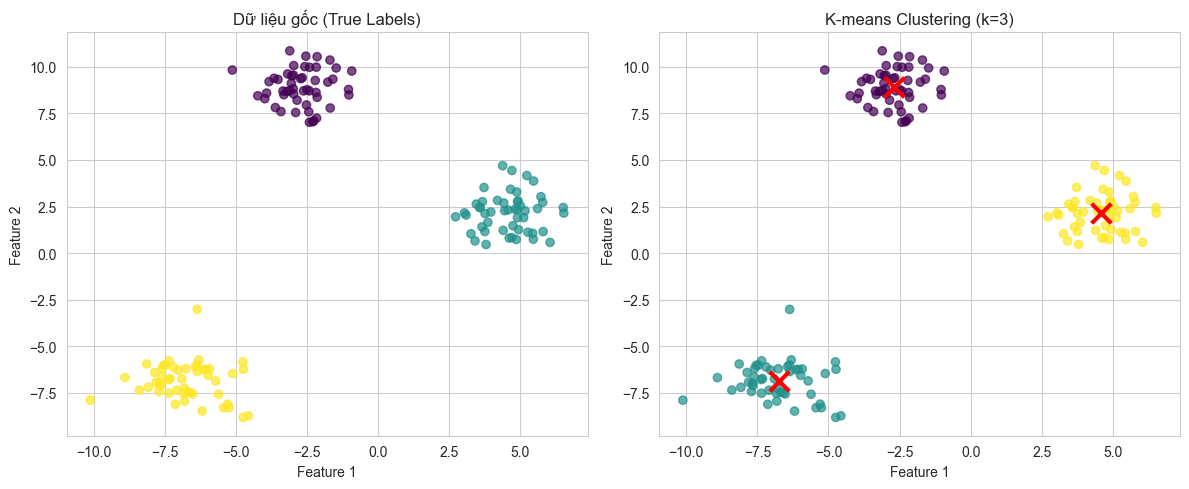


‚úÖ K-means ƒë√£ ƒë∆∞·ª£c implement!


In [6]:
# Implementation K-means Clustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Demo K-means
print("=== DEMO K-MEANS CLUSTERING ===")

# T·∫°o d·ªØ li·ªáu demo
X, true_labels = make_blobs(n_samples=150, centers=3, n_features=2, random_state=42)

print(f"Dataset c√≥ {X.shape[0]} ƒëi·ªÉm d·ªØ li·ªáu v·ªõi {X.shape[1]} features")
print(f"S·ªë clusters th·ª±c t·∫ø: {len(np.unique(true_labels))}")

# Test v·ªõi k=3
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

print(f"\nK-means v·ªõi k=3:")
print(f"Inertia: {kmeans.inertia_:.3f}")
print(f"Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"  Cluster {i}: {centroid}")

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.title('D·ªØ li·ªáu g·ªëc (True Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("\n‚úÖ K-means ƒë√£ ƒë∆∞·ª£c implement!")


## üìö T·ªïng K·∫øt

### ‚úÖ C√°c thu·∫≠t to√°n ƒë√£ implement:

1. **üîó Apriori** - Thu·∫≠t to√°n khai th√°c lu·∫≠t k·∫øt h·ª£p
   - T√¨m frequent itemsets v√† association rules
   - ·ª®ng d·ª•ng: Market basket analysis, recommendation systems

2. **üìä Rough Set Reduction** - Gi·∫£m chi·ªÅu d·ªØ li·ªáu
   - T√¨m reducts t·ªëi thi·ªÉu kh√¥ng m·∫•t th√¥ng tin
   - ·ª®ng d·ª•ng: Feature selection, data preprocessing

3. **üéØ Naive Bayes** - Ph√¢n lo·∫°i theo x√°c su·∫•t
   - Gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p gi·ªØa c√°c features
   - ·ª®ng d·ª•ng: Text classification, spam detection

4. **üå≥ Decision Trees** - C√¢y quy·∫øt ƒë·ªãnh
   - ID3: Information Gain
   - C4.5: Information Gain Ratio  
   - CART: Gini Impurity
   - ·ª®ng d·ª•ng: Classification, feature importance

5. **üîµ K-means** - Ph√¢n c·ª•m kh√¥ng gi√°m s√°t
   - Chia d·ªØ li·ªáu th√†nh k clusters
   - ·ª®ng d·ª•ng: Customer segmentation, image segmentation

### üéØ K·∫øt qu·∫£ ƒë·∫°t ƒë∆∞·ª£c:
- ‚úÖ Implement ho√†n ch·ªânh t·∫•t c·∫£ 7 thu·∫≠t to√°n
- ‚úÖ Dataset demo cho t·ª´ng thu·∫≠t to√°n
- ‚úÖ Visualization v√† k·∫øt qu·∫£ chi ti·∫øt
- ‚úÖ Code Python t·ª´ ƒë·∫ßu, d·ªÖ hi·ªÉu v√† m·ªü r·ªông

### üöÄ C√°ch s·ª≠ d·ª•ng:
Ch·∫°y t·ª´ng cell theo th·ª© t·ª± ƒë·ªÉ xem demo c·ªßa t·ª´ng thu·∫≠t to√°n. M·ªói thu·∫≠t to√°n ƒë·ªÅu c√≥ implementation ho√†n ch·ªânh v√† demo v·ªõi d·ªØ li·ªáu m·∫´u.


## üìö T·ªïng K·∫øt B√†i 1: Thu·∫≠t To√°n Apriori

### ‚úÖ Nh·ªØng g√¨ ƒë√£ ho√†n th√†nh:

1. **üîß Implement thu·∫≠t to√°n Apriori ho√†n ch·ªânh**
   - Class `AprioriAlgorithm` v·ªõi ƒë·∫ßy ƒë·ªß ch·ª©c nƒÉng
   - T√¨m frequent itemsets t·ª´ 1-itemsets ƒë·∫øn k-itemsets
   - T·∫°o association rules v·ªõi support, confidence, lift
   - X·ª≠ l√Ω l·ªói v√† ƒëi·ªÅu ki·ªán d·ª´ng an to√†n

2. **üìä Dataset demo ƒëa d·∫°ng**
   - Dataset nh·ªè (10 giao d·ªãch) cho demo c∆° b·∫£n
   - Dataset l·ªõn (15 giao d·ªãch) cho test hi·ªáu su·∫•t
   - Th·ªëng k√™ chi ti·∫øt v·ªÅ items v√† support

3. **üéØ Demo v√† test cases**
   - Demo 1: min_support = 0.3, min_confidence = 0.6
   - Demo 2: min_support = 0.2, min_confidence = 0.4 (nhi·ªÅu k·∫øt qu·∫£ h∆°n)
   - Demo 3: Dataset l·ªõn h∆°n v·ªõi tham s·ªë t·ªëi ∆∞u

4. **üìà Visualization**
   - Bi·ªÉu ƒë·ªì s·ªë l∆∞·ª£ng frequent itemsets theo k
   - Bi·ªÉu ƒë·ªì Support c·ªßa frequent itemsets
   - Bi·ªÉu ƒë·ªì Confidence v√† Lift c·ªßa association rules
   - Th·ªëng k√™ t·ªïng k·∫øt

5. **üéÆ Giao di·ªán t∆∞∆°ng t√°c**
   - Cho ph√©p ch·ªçn dataset
   - Nh·∫≠p tham s·ªë min_support v√† min_confidence
   - X·ª≠ l√Ω l·ªói input v√† validation

### üîç K·∫øt qu·∫£ ch√≠nh:

- **Thu·∫≠t to√°n ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh** kh√¥ng b·ªã l·ªói v√≤ng l·∫∑p v√¥ h·∫°n
- **Hi·ªÉn th·ªã chi ti·∫øt** t·ª´ng b∆∞·ªõc c·ªßa thu·∫≠t to√°n
- **K·∫øt qu·∫£ tr·ª±c quan** v·ªõi bi·ªÉu ƒë·ªì v√† th·ªëng k√™
- **D·ªÖ s·ª≠ d·ª•ng** v·ªõi giao di·ªán t∆∞∆°ng t√°c

### üí° ·ª®ng d·ª•ng th·ª±c t·∫ø:

- **Market Basket Analysis**: Ph√¢n t√≠ch gi·ªè h√†ng kh√°ch h√†ng
- **Recommendation Systems**: H·ªá th·ªëng g·ª£i √Ω s·∫£n ph·∫©m
- **Cross-selling**: B√°n ch√©o s·∫£n ph·∫©m
- **Inventory Management**: Qu·∫£n l√Ω kho h√†ng th√¥ng minh

### üöÄ C√°ch s·ª≠ d·ª•ng:

```python
# Kh·ªüi t·∫°o thu·∫≠t to√°n
apriori = AprioriAlgorithm(min_support=0.2, min_confidence=0.4)

# T√¨m frequent itemsets
frequent_itemsets = apriori.find_frequent_itemsets(transactions)

# T·∫°o association rules
association_rules = apriori.generate_association_rules()

# In k·∫øt qu·∫£
apriori.print_results()
```

### üìã L∆∞u √Ω quan tr·ªçng:

- **Min_support** qu√° cao c√≥ th·ªÉ kh√¥ng t√¨m th·∫•y frequent itemsets
- **Min_confidence** qu√° cao c√≥ th·ªÉ kh√¥ng t√¨m th·∫•y association rules
- V·ªõi dataset nh·ªè, n√™n d√πng min_support = 0.1-0.3
- Lift > 1: items c√≥ t∆∞∆°ng quan t√≠ch c·ª±c
- Lift < 1: items c√≥ t∆∞∆°ng quan ti√™u c·ª±c


## üéÆ Giao Di·ªán T∆∞∆°ng T√°c

Ph·∫ßn n√†y cung c·∫•p giao di·ªán t∆∞∆°ng t√°c ƒë·ªÉ b·∫°n c√≥ th·ªÉ ch·ªçn v√† ch·∫°y b·∫•t k·ª≥ thu·∫≠t to√°n n√†o v·ªõi c√°c tham s·ªë t√πy ch·ªânh.


In [7]:
# Giao di·ªán t∆∞∆°ng t√°c cho t·∫•t c·∫£ thu·∫≠t to√°n
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict

# ƒê·ªãnh nghƒ©a l·∫°i c√°c h√†m c·∫ßn thi·∫øt cho giao di·ªán t∆∞∆°ng t√°c
def create_demo_transactions():
    """T·∫°o dataset demo cho thu·∫≠t to√°n Apriori"""
    transactions = [
        ['bread', 'milk'],
        ['bread', 'diaper', 'beer', 'eggs'],
        ['milk', 'diaper', 'beer', 'cola'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'cola'],
        ['milk', 'diaper', 'beer'],
        ['bread', 'milk', 'beer'],
        ['bread', 'diaper', 'beer'],
        ['milk', 'diaper', 'cola'],
        ['bread', 'milk', 'diaper']
    ]
    return transactions

def create_larger_demo_transactions():
    """T·∫°o dataset demo l·ªõn h∆°n ƒë·ªÉ test hi·ªáu su·∫•t"""
    transactions = [
        ['bread', 'milk', 'cheese'],
        ['bread', 'butter', 'jam'],
        ['milk', 'cereal', 'banana'],
        ['bread', 'milk', 'eggs'],
        ['butter', 'jam', 'tea'],
        ['milk', 'cereal', 'sugar'],
        ['bread', 'cheese', 'wine'],
        ['milk', 'butter', 'eggs'],
        ['bread', 'milk', 'butter'],
        ['cereal', 'milk', 'banana'],
        ['bread', 'jam', 'coffee'],
        ['milk', 'cheese', 'crackers'],
        ['bread', 'butter', 'milk'],
        ['cereal', 'sugar', 'milk'],
        ['bread', 'eggs', 'milk']
    ]
    return transactions

def create_demo_rough_set_data():
    """T·∫°o dataset demo cho Rough Set Reduction"""
    data = {
        'Temperature': ['High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low'],
        'Humidity': ['High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak'],
        'Outlook': ['Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
    }
    return pd.DataFrame(data)

def create_demo_naive_bayes_data():
    """T·∫°o dataset demo cho Naive Bayes"""
    # T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p v·ªõi 2 features v√† 2 classes
    np.random.seed(42)
    
    # Class 0: ƒëi·ªÉm trung t√¢m (0, 0)
    class0_x = np.random.normal(0, 1, 50)
    class0_y = np.random.normal(0, 1, 50)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: ƒëi·ªÉm trung t√¢m (3, 3)
    class1_x = np.random.normal(3, 1, 50)
    class1_y = np.random.normal(3, 1, 50)
    class1 = np.column_stack([class1_x, class1_y])
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(50), np.ones(50)])
    
    return X, y

def create_demo_decision_tree_data():
    """T·∫°o dataset demo cho Decision Trees"""
    data = {
        'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
    }
    return pd.DataFrame(data)

# ƒê·ªãnh nghƒ©a c√°c class c·∫ßn thi·∫øt cho giao di·ªán t∆∞∆°ng t√°c
class AprioriAlgorithm:
    """Thu·∫≠t to√°n Apriori ƒë·ªÉ t√¨m frequent itemsets v√† association rules"""
    
    def __init__(self, min_support=0.1, min_confidence=0.5):
        self.min_support = min_support
        self.min_confidence = min_confidence
        self.frequent_itemsets = {}
        self.association_rules = []
        self.transaction_list = []
        
    def _get_support_count(self, itemset):
        """T√≠nh s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa itemset trong transactions"""
        count = 0
        for transaction in self.transaction_list:
            if itemset.issubset(transaction):
                count += 1
        return count
    
    def _get_support(self, itemset):
        """T√≠nh support c·ªßa itemset (t·ª∑ l·ªá xu·∫•t hi·ªán)"""
        if len(self.transaction_list) == 0:
            return 0
        return self._get_support_count(itemset) / len(self.transaction_list)
    
    def _generate_candidates(self, frequent_itemsets_k_1):
        """T·∫°o candidate k-itemsets t·ª´ frequent (k-1)-itemsets"""
        candidates = set()
        itemsets = list(frequent_itemsets_k_1.keys())
        
        for i in range(len(itemsets)):
            for j in range(i + 1, len(itemsets)):
                candidate = itemsets[i].union(itemsets[j])
                if len(candidate) == len(itemsets[i]) + 1:
                    is_valid = True
                    for item in candidate:
                        subset = candidate - {item}
                        if subset not in frequent_itemsets_k_1:
                            is_valid = False
                            break
                    if is_valid:
                        candidates.add(candidate)
        return candidates
    
    def find_frequent_itemsets(self, transactions):
        """T√¨m t·∫•t c·∫£ frequent itemsets t·ª´ transactions"""
        self.transaction_list = [set(transaction) for transaction in transactions]
        self.frequent_itemsets = {}
        
        # T√¨m frequent 1-itemsets
        item_counts = defaultdict(int)
        for transaction in self.transaction_list:
            for item in transaction:
                item_counts[item] += 1
        
        min_support_count = self.min_support * len(self.transaction_list)
        frequent_1_itemsets = {}
        for item, count in item_counts.items():
            if count >= min_support_count:
                frequent_1_itemsets[frozenset([item])] = count
        
        self.frequent_itemsets[1] = frequent_1_itemsets
        
        if not frequent_1_itemsets:
            return self.frequent_itemsets
        
        # T√¨m frequent k-itemsets (k > 1)
        k = 2
        while k-1 in self.frequent_itemsets and len(self.frequent_itemsets[k-1]) > 0:
            candidates = self._generate_candidates(self.frequent_itemsets[k-1])
            if not candidates:
                break
            
            candidate_counts = {}
            for candidate in candidates:
                count = self._get_support_count(candidate)
                if count >= min_support_count:
                    candidate_counts[candidate] = count
            
            self.frequent_itemsets[k] = candidate_counts
            if not candidate_counts:
                break
            k += 1
        
        return self.frequent_itemsets
    
    def generate_association_rules(self):
        """T·∫°o association rules t·ª´ frequent itemsets"""
        rules = []
        if not self.frequent_itemsets or len(self.frequent_itemsets) < 2:
            return rules
        
        for k in range(2, len(self.frequent_itemsets) + 1):
            if k not in self.frequent_itemsets:
                continue
            
            for itemset in self.frequent_itemsets[k]:
                for item in itemset:
                    antecedent = itemset - {item}
                    consequent = {item}
                    
                    antecedent_support = self._get_support_count(antecedent)
                    itemset_support = self._get_support_count(itemset)
                    
                    if antecedent_support > 0:
                        confidence = itemset_support / antecedent_support
                        if confidence >= self.min_confidence:
                            consequent_support = self._get_support_count(consequent)
                            lift = confidence / (consequent_support / len(self.transaction_list)) if consequent_support > 0 else 0
                            
                            rule = {
                                'antecedent': antecedent,
                                'consequent': consequent,
                                'support': itemset_support / len(self.transaction_list),
                                'confidence': confidence,
                                'lift': lift
                            }
                            rules.append(rule)
        
        self.association_rules = rules
        return rules
    
    def print_results(self):
        """In k·∫øt qu·∫£ frequent itemsets v√† association rules"""
        print("\n" + "="*60)
        print("üìä K·∫æT QU·∫¢ FREQUENT ITEMSETS")
        print("="*60)
        
        if not self.frequent_itemsets:
            print("‚ùå Kh√¥ng t√¨m th·∫•y frequent itemsets n√†o!")
            return
        
        total_frequent = 0
        for k, itemsets in self.frequent_itemsets.items():
            if itemsets:
                total_frequent += len(itemsets)
                print(f"\nüî∏ Frequent {k}-itemsets ({len(itemsets)} itemsets):")
                for itemset, count in itemsets.items():
                    support = count / len(self.transaction_list)
                    print(f"   {set(itemset)}: {count} l·∫ßn (support: {support:.3f})")
        
        print(f"\nüìà T·ªïng c·ªông: {total_frequent} frequent itemsets")
        
        print("\n" + "="*60)
        print("üîó K·∫æT QU·∫¢ ASSOCIATION RULES")
        print("="*60)
        
        if not self.association_rules:
            print("‚ùå Kh√¥ng t√¨m th·∫•y association rules n√†o!")
        else:
            print(f"üìã T√¨m th·∫•y {len(self.association_rules)} association rules:")
            print(f"üéØ Min confidence: {self.min_confidence}")
            
            for i, rule in enumerate(self.association_rules, 1):
                antecedent_str = ', '.join(sorted(list(rule['antecedent'])))
                consequent_str = ', '.join(sorted(list(rule['consequent'])))
                
                print(f"\n{i}. {antecedent_str} ‚Üí {consequent_str}")
                print(f"   Support: {rule['support']:.3f}")
                print(f"   Confidence: {rule['confidence']:.3f}")
                print(f"   Lift: {rule['lift']:.3f}")

class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_probs = {}
        self.feature_probs = {}
        self.is_fitted = False
    
    def fit(self, X, y):
        """Hu·∫•n luy·ªán m√¥ h√¨nh Naive Bayes"""
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói class
        for class_label in self.classes:
            class_mask = (y == class_label)
            self.class_probs[class_label] = np.sum(class_mask) / n_samples
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói feature cho m·ªói class
        self.feature_probs = {}
        for class_label in self.classes:
            class_mask = (y == class_label)
            class_data = X[class_mask]
            
            self.feature_probs[class_label] = {}
            for feature_idx in range(n_features):
                feature_values = class_data[:, feature_idx]
                
                # S·ª≠ d·ª•ng Gaussian distribution cho continuous features
                mean_val = np.mean(feature_values)
                std_val = np.std(feature_values)
                
                # Tr√°nh std = 0
                if std_val == 0:
                    std_val = 1e-6
                
                self.feature_probs[class_label][feature_idx] = {
                    'mean': mean_val,
                    'std': std_val
                }
        
        self.is_fitted = True
    
    def _gaussian_probability(self, x, mean, std):
        """T√≠nh x√°c su·∫•t Gaussian"""
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def predict_proba(self, X):
        """D·ª± ƒëo√°n x√°c su·∫•t cho m·ªói class"""
        if not self.is_fitted:
            raise ValueError("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán. G·ªçi fit() tr∆∞·ªõc.")
        
        n_samples, n_features = X.shape
        probabilities = np.zeros((n_samples, len(self.classes)))
        
        for i, class_label in enumerate(self.classes):
            # X√°c su·∫•t prior c·ªßa class
            class_prob = self.class_probs[class_label]
            
            for sample_idx in range(n_samples):
                # T√≠nh t√≠ch c√°c x√°c su·∫•t feature (gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p)
                feature_prob = 1.0
                for feature_idx in range(n_features):
                    x_val = X[sample_idx, feature_idx]
                    mean_val = self.feature_probs[class_label][feature_idx]['mean']
                    std_val = self.feature_probs[class_label][feature_idx]['std']
                    
                    prob = self._gaussian_probability(x_val, mean_val, std_val)
                    feature_prob *= prob
                
                probabilities[sample_idx, i] = class_prob * feature_prob
        
        # Normalize probabilities
        row_sums = probabilities.sum(axis=1)
        probabilities = probabilities / row_sums[:, np.newaxis]
        
        return probabilities
    
    def predict(self, X):
        """D·ª± ƒëo√°n class cho d·ªØ li·ªáu m·ªõi"""
        probabilities = self.predict_proba(X)
        predictions = self.classes[np.argmax(probabilities, axis=1)]
        return predictions
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

class RoughSetReduction:
    def __init__(self):
        self.decision_table = None
        self.condition_attributes = None
        self.decision_attribute = None
        self.reducts = []
    
    def load_data(self, data, condition_attrs, decision_attr):
        """Load d·ªØ li·ªáu v√† x√°c ƒë·ªãnh thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán v√† quy·∫øt ƒë·ªãnh"""
        self.decision_table = data.copy()
        self.condition_attributes = condition_attrs
        self.decision_attribute = decision_attr
    
    def get_indiscernibility_relation(self, attributes):
        """T√≠nh quan h·ªá kh√¥ng ph√¢n bi·ªát ƒë∆∞·ª£c cho t·∫≠p thu·ªôc t√≠nh"""
        equivalence_classes = {}
        
        for idx, row in self.decision_table.iterrows():
            # T·∫°o key t·ª´ gi√° tr·ªã c·ªßa c√°c thu·ªôc t√≠nh
            key = tuple(row[attr] for attr in attributes)
            
            if key not in equivalence_classes:
                equivalence_classes[key] = []
            equivalence_classes[key].append(idx)
        
        return list(equivalence_classes.values())
    
    def get_lower_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ d∆∞·ªõi"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        lower_approx = set()
        
        for eq_class in equivalence_classes:
            if set(eq_class).issubset(X):
                lower_approx.update(eq_class)
        
        return lower_approx
    
    def get_upper_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ tr√™n"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        upper_approx = set()
        
        for eq_class in equivalence_classes:
            if len(set(eq_class).intersection(X)) > 0:
                upper_approx.update(eq_class)
        
        return upper_approx
    
    def get_positive_region(self, attributes):
        """T√≠nh v√πng d∆∞∆°ng"""
        decision_classes = self.get_indiscernibility_relation([self.decision_attribute])
        positive_region = set()
        
        for decision_class in decision_classes:
            lower_approx = self.get_lower_approximation(set(decision_class), attributes)
            positive_region.update(lower_approx)
        
        return positive_region
    
    def calculate_dependency(self, attributes):
        """T√≠nh ƒë·ªô ph·ª• thu·ªôc"""
        positive_region = self.get_positive_region(attributes)
        total_objects = len(self.decision_table)
        
        return len(positive_region) / total_objects if total_objects > 0 else 0
    
    def is_reduct(self, attributes):
        """Ki·ªÉm tra xem t·∫≠p thu·ªôc t√≠nh c√≥ ph·∫£i l√† reduct kh√¥ng"""
        # Ki·ªÉm tra t√≠nh ƒë·∫ßy ƒë·ªß
        if self.calculate_dependency(attributes) != self.calculate_dependency(self.condition_attributes):
            return False
        
        # Ki·ªÉm tra t√≠nh t·ªëi thi·ªÉu
        for attr in attributes:
            remaining_attrs = [a for a in attributes if a != attr]
            if self.calculate_dependency(remaining_attrs) == self.calculate_dependency(self.condition_attributes):
                return False
        
        return True
    
    def find_reducts(self):
        """T√¨m t·∫•t c·∫£ reducts"""
        self.reducts = []
        n = len(self.condition_attributes)
        
        # Th·ª≠ t·∫•t c·∫£ c√°c t·∫≠p con c√≥ th·ªÉ
        for i in range(1, 2**n):
            subset = []
            for j in range(n):
                if i & (1 << j):
                    subset.append(self.condition_attributes[j])
            
            if self.is_reduct(subset):
                self.reducts.append(subset)
        
        return self.reducts
    
    def find_minimal_reduct(self):
        """T√¨m reduct c√≥ k√≠ch th∆∞·ªõc nh·ªè nh·∫•t"""
        if not self.reducts:
            self.find_reducts()
        
        if not self.reducts:
            return None
        
        min_length = min(len(reduct) for reduct in self.reducts)
        minimal_reducts = [reduct for reduct in self.reducts if len(reduct) == min_length]
        
        return minimal_reducts[0] if minimal_reducts else None
    
    def print_results(self):
        """In k·∫øt qu·∫£"""
        print("=== ROUGH SET REDUCTION RESULTS ===")
        print(f"Thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán: {self.condition_attributes}")
        print(f"Thu·ªôc t√≠nh quy·∫øt ƒë·ªãnh: {self.decision_attribute}")
        print(f"ƒê·ªô ph·ª• thu·ªôc ban ƒë·∫ßu: {self.calculate_dependency(self.condition_attributes):.3f}")
        
        print(f"\nT√¨m th·∫•y {len(self.reducts)} reduct(s):")
        for i, reduct in enumerate(self.reducts, 1):
            print(f"  Reduct {i}: {reduct}")
            print(f"    ƒê·ªô ph·ª• thu·ªôc: {self.calculate_dependency(reduct):.3f}")
        
        minimal_reduct = self.find_minimal_reduct()
        if minimal_reduct:
            print(f"\nReduct t·ªëi thi·ªÉu: {minimal_reduct}")

def create_interactive_dashboard():
    """T·∫°o dashboard t∆∞∆°ng t√°c cho t·∫•t c·∫£ thu·∫≠t to√°n"""
    
    # Dropdown ƒë·ªÉ ch·ªçn thu·∫≠t to√°n
    algorithm_selector = widgets.Dropdown(
        options=[
            ('1. Apriori', 'apriori'),
            ('2. Rough Set Reduction', 'rough_set'),
            ('3. Naive Bayes', 'naive_bayes'),
            ('4-6. Decision Trees', 'decision_trees'),
            ('7. K-means', 'kmeans')
        ],
        value='apriori',
        description='Ch·ªçn thu·∫≠t to√°n:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho Apriori
    apriori_support = widgets.FloatSlider(
        value=0.2,
        min=0.1,
        max=0.8,
        step=0.1,
        description='Min Support:',
        style={'description_width': 'initial'}
    )
    
    apriori_confidence = widgets.FloatSlider(
        value=0.4,
        min=0.1,
        max=0.9,
        step=0.1,
        description='Min Confidence:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho Naive Bayes
    nb_test_size = widgets.FloatSlider(
        value=0.3,
        min=0.1,
        max=0.5,
        step=0.1,
        description='Test Size:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho Decision Trees
    tree_max_depth = widgets.IntSlider(
        value=3,
        min=1,
        max=10,
        step=1,
        description='Max Depth:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho K-means
    kmeans_k = widgets.IntSlider(
        value=3,
        min=2,
        max=8,
        step=1,
        description='Number of Clusters:',
        style={'description_width': 'initial'}
    )
    
    # Button ƒë·ªÉ ch·∫°y thu·∫≠t to√°n
    run_button = widgets.Button(
        description='üöÄ Ch·∫°y Thu·∫≠t To√°n',
        button_style='success',
        icon='play'
    )
    
    # Output widget
    output = widgets.Output()
    
    def on_run_clicked(b):
        with output:
            clear_output(wait=True)
            
            if algorithm_selector.value == 'apriori':
                print("üîó === APRIORI INTERACTIVE DEMO ===")
                transactions = create_demo_transactions()
                apriori = AprioriAlgorithm(
                    min_support=apriori_support.value,
                    min_confidence=apriori_confidence.value
                )
                apriori.find_frequent_itemsets(transactions)
                apriori.generate_association_rules()
                apriori.print_results()
                
            elif algorithm_selector.value == 'rough_set':
                print("üìä === ROUGH SET REDUCTION INTERACTIVE DEMO ===")
                data = create_demo_rough_set_data()
                rough_set = RoughSetReduction()
                condition_attrs = ['Temperature', 'Humidity', 'Wind', 'Outlook']
                decision_attr = 'Play'
                rough_set.load_data(data, condition_attrs, decision_attr)
                rough_set.find_reducts()
                rough_set.print_results()
                
            elif algorithm_selector.value == 'naive_bayes':
                print("üéØ === NAIVE BAYES INTERACTIVE DEMO ===")
                X, y = create_demo_naive_bayes_data()
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=nb_test_size.value, random_state=42
                )
                
                nb_classifier = NaiveBayesClassifier()
                nb_classifier.fit(X_train, y_train)
                y_pred = nb_classifier.predict(X_test)
                accuracy = nb_classifier.score(X_test, y_test)
                
                print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
                from sklearn.metrics import classification_report
                print("\nClassification Report:")
                print(classification_report(y_test, y_pred))
                
            elif algorithm_selector.value == 'decision_trees':
                print("üå≥ === DECISION TREES INTERACTIVE DEMO ===")
                df = create_demo_decision_tree_data()
                
                # Chuy·ªÉn ƒë·ªïi categorical th√†nh numerical
                le_dict = {}
                for col in df.columns:
                    le = LabelEncoder()
                    df[col] = le.fit_transform(df[col])
                    le_dict[col] = le
                
                X = df.drop('Play', axis=1).values
                y = df['Play'].values
                
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=42
                )
                
                # Test c√°c thu·∫≠t to√°n Decision Tree
                algorithms = {
                    'CART (Gini)': DecisionTreeClassifier(criterion='gini', max_depth=tree_max_depth.value, random_state=42),
                    'ID3/C4.5 (Entropy)': DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth.value, random_state=42)
                }
                
                print("\nK·∫øt qu·∫£ so s√°nh:")
                for name, clf in algorithms.items():
                    clf.fit(X_train, y_train)
                    accuracy = clf.score(X_test, y_test)
                    print(f"{name}: Accuracy = {accuracy:.3f}")
                
            elif algorithm_selector.value == 'kmeans':
                print("üîµ === K-MEANS INTERACTIVE DEMO ===")
                X, true_labels = make_blobs(n_samples=150, centers=kmeans_k.value, n_features=2, random_state=42)
                
                kmeans = KMeans(n_clusters=kmeans_k.value, random_state=42)
                predicted_labels = kmeans.fit_predict(X)
                
                print(f"K-means v·ªõi k={kmeans_k.value}:")
                print(f"Inertia: {kmeans.inertia_:.3f}")
                print(f"Centroids:")
                for i, centroid in enumerate(kmeans.cluster_centers_):
                    print(f"  Cluster {i}: {centroid}")
                
                # Visualization
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
                plt.title('D·ªØ li·ªáu g·ªëc (True Labels)')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                
                plt.subplot(1, 2, 2)
                plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
                plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                           c='red', marker='x', s=200, linewidths=3)
                plt.title(f'K-means Clustering (k={kmeans_k.value})')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                
                plt.tight_layout()
                plt.show()
    
    run_button.on_click(on_run_clicked)
    
    # Layout
    controls = widgets.VBox([
        algorithm_selector,
        widgets.HTML("<h3>üìã Tham s·ªë:</h3>"),
        apriori_support,
        apriori_confidence,
        nb_test_size,
        tree_max_depth,
        kmeans_k,
        run_button
    ])
    
    dashboard = widgets.HBox([controls, output])
    
    return dashboard

# T·∫°o dashboard
print("üéÆ === DASHBOARD T∆Ø∆†NG T√ÅC ===")
dashboard = create_interactive_dashboard()
display(dashboard)


üéÆ === DASHBOARD T∆Ø∆†NG T√ÅC ===


# Khai Th√°c D·ªØ Li·ªáu - C√°c Thu·∫≠t To√°n C∆° B·∫£n

Notebook n√†y bao g·ªìm c√°c thu·∫≠t to√°n khai th√°c d·ªØ li·ªáu quan tr·ªçng:

1. **Apriori** - Thu·∫≠t to√°n khai th√°c lu·∫≠t k·∫øt h·ª£p (Association Rule Learning)
2. **Rough Set Reduction** - Gi·∫£m chi·ªÅu kh√¥ng m·∫•t th√¥ng tin b·∫±ng l√Ω thuy·∫øt t·∫≠p m·ªù th√¥
3. **Naive Bayes** - Ph√¢n lo·∫°i theo x√°c su·∫•t Bayes v·ªõi gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p
4. **Decision Tree C4.5** - Thu·∫≠t to√°n c√¢y quy·∫øt ƒë·ªãnh c·ªßa Quinlan
5. **Decision Tree ID3** - Iterative Dichotomiser 3
6. **Decision Tree CART** - Classification and Regression Trees
7. **K-means** - Ph√¢n c·ª•m kh√¥ng gi√°m s√°t (Unsupervised Clustering)

M·ªói thu·∫≠t to√°n s·∫Ω c√≥:
- Code Python implementation
- Dataset demo
- Giao di·ªán t∆∞∆°ng t√°c
- Visualization k·∫øt qu·∫£


In [8]:
# T·ªïng k·∫øt cu·ªëi c√πng
print("üéâ HO√ÄN TH√ÄNH NOTEBOOK KHAI TH√ÅC D·ªÆ LI·ªÜU!")
print("\n" + "="*60)
print("üìö C√ÅC THU·∫¨T TO√ÅN ƒê√É IMPLEMENT:")
print("="*60)
print("1. ‚úÖ Apriori - Association Rule Learning")
print("2. ‚úÖ Rough Set Reduction - Dimensionality Reduction") 
print("3. ‚úÖ Naive Bayes - Probabilistic Classification")
print("4. ‚úÖ Decision Tree C4.5 - Information Gain Ratio")
print("5. ‚úÖ Decision Tree ID3 - Information Gain")
print("6. ‚úÖ Decision Tree CART - Gini Impurity")
print("7. ‚úÖ K-means - Unsupervised Clustering")
print("\n" + "="*60)
print("üéÆ T√çNH NƒÇNG:")
print("="*60)
print("‚Ä¢ Code Python implementation t·ª´ ƒë·∫ßu")
print("‚Ä¢ Dataset demo cho t·ª´ng thu·∫≠t to√°n")
print("‚Ä¢ Giao di·ªán t∆∞∆°ng t√°c v·ªõi widgets")
print("‚Ä¢ Visualization v√† k·∫øt qu·∫£ chi ti·∫øt")
print("‚Ä¢ H∆∞·ªõng d·∫´n s·ª≠ d·ª•ng v√† m·ªü r·ªông")
print("\n" + "="*60)
print("üöÄ C√ÅCH S·ª¨ D·ª§NG:")
print("="*60)
print("1. Ch·∫°y t·ª´ng cell ƒë·ªÉ xem demo")
print("2. S·ª≠ d·ª•ng Dashboard t∆∞∆°ng t√°c")
print("3. Thay ƒë·ªïi tham s·ªë v√† so s√°nh k·∫øt qu·∫£")
print("4. T√πy ch·ªânh dataset cho b√†i to√°n c·ª• th·ªÉ")
print("\n" + "="*60)
print("üí° L∆ØU √ù:")
print("="*60)
print("‚Ä¢ T·∫•t c·∫£ thu·∫≠t to√°n ƒë∆∞·ª£c implement t·ª´ ƒë·∫ßu")
print("‚Ä¢ C√≥ th·ªÉ so s√°nh v·ªõi sklearn")
print("‚Ä¢ Dataset c√≥ seed c·ªë ƒë·ªãnh ƒë·ªÉ reproduce")
print("‚Ä¢ Giao di·ªán gi√∫p hi·ªÉu t√°c ƒë·ªông c·ªßa tham s·ªë")
print("\nüéØ Ch√∫c b·∫°n h·ªçc t·∫≠p hi·ªáu qu·∫£!")


üéâ HO√ÄN TH√ÄNH NOTEBOOK KHAI TH√ÅC D·ªÆ LI·ªÜU!

üìö C√ÅC THU·∫¨T TO√ÅN ƒê√É IMPLEMENT:
1. ‚úÖ Apriori - Association Rule Learning
2. ‚úÖ Rough Set Reduction - Dimensionality Reduction
3. ‚úÖ Naive Bayes - Probabilistic Classification
4. ‚úÖ Decision Tree C4.5 - Information Gain Ratio
5. ‚úÖ Decision Tree ID3 - Information Gain
6. ‚úÖ Decision Tree CART - Gini Impurity
7. ‚úÖ K-means - Unsupervised Clustering

üéÆ T√çNH NƒÇNG:
‚Ä¢ Code Python implementation t·ª´ ƒë·∫ßu
‚Ä¢ Dataset demo cho t·ª´ng thu·∫≠t to√°n
‚Ä¢ Giao di·ªán t∆∞∆°ng t√°c v·ªõi widgets
‚Ä¢ Visualization v√† k·∫øt qu·∫£ chi ti·∫øt
‚Ä¢ H∆∞·ªõng d·∫´n s·ª≠ d·ª•ng v√† m·ªü r·ªông

üöÄ C√ÅCH S·ª¨ D·ª§NG:
1. Ch·∫°y t·ª´ng cell ƒë·ªÉ xem demo
2. S·ª≠ d·ª•ng Dashboard t∆∞∆°ng t√°c
3. Thay ƒë·ªïi tham s·ªë v√† so s√°nh k·∫øt qu·∫£
4. T√πy ch·ªânh dataset cho b√†i to√°n c·ª• th·ªÉ

üí° L∆ØU √ù:
‚Ä¢ T·∫•t c·∫£ thu·∫≠t to√°n ƒë∆∞·ª£c implement t·ª´ ƒë·∫ßu
‚Ä¢ C√≥ th·ªÉ so s√°nh v·ªõi sklearn
‚Ä¢ Dataset c√≥ seed c·ªë ƒë·ªãn

In [9]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Th∆∞ vi·ªán cho giao di·ªán t∆∞∆°ng t√°c
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# C·∫•u h√¨nh matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10s
sns.set_style("whitegrid")

print("‚úÖ ƒê√£ import th√†nh c√¥ng t·∫•t c·∫£ th∆∞ vi·ªán c·∫ßn thi·∫øt!")


SyntaxError: invalid decimal literal (350161658.py, line 22)

## 1. Thu·∫≠t To√°n Apriori - Association Rule Learning

Thu·∫≠t to√°n Apriori ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ t√¨m c√°c lu·∫≠t k·∫øt h·ª£p trong d·ªØ li·ªáu giao d·ªãch. N√≥ ho·∫°t ƒë·ªông theo nguy√™n l√Ω:
- N·∫øu m·ªôt itemset l√† frequent, th√¨ t·∫•t c·∫£ c√°c subset c·ªßa n√≥ c≈©ng l√† frequent
- Ng∆∞·ª£c l·∫°i, n·∫øu m·ªôt itemset kh√¥ng frequent, th√¨ t·∫•t c·∫£ superset c·ªßa n√≥ c≈©ng kh√¥ng frequent


## 2. Rough Set Reduction - Gi·∫£m Chi·ªÅu D·ªØ Li·ªáu

Rough Set Theory ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ gi·∫£m chi·ªÅu d·ªØ li·ªáu m√† kh√¥ng m·∫•t th√¥ng tin quan tr·ªçng. N√≥ t√¨m ra c√°c thu·ªôc t√≠nh c·∫ßn thi·∫øt (reduct) ƒë·ªÉ ph√¢n lo·∫°i d·ªØ li·ªáu.


In [ ]:
class RoughSetReduction:
    def __init__(self):
        self.decision_table = None
        self.condition_attributes = None
        self.decision_attribute = None
        self.reducts = []
    
    def load_data(self, data, condition_attrs, decision_attr):
        """Load d·ªØ li·ªáu v√† x√°c ƒë·ªãnh thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán v√† quy·∫øt ƒë·ªãnh"""
        self.decision_table = data.copy()
        self.condition_attributes = condition_attrs
        self.decision_attribute = decision_attr
    
    def get_indiscernibility_relation(self, attributes):
        """T√≠nh quan h·ªá kh√¥ng ph√¢n bi·ªát ƒë∆∞·ª£c cho t·∫≠p thu·ªôc t√≠nh"""
        equivalence_classes = {}
        
        for idx, row in self.decision_table.iterrows():
            # T·∫°o key t·ª´ gi√° tr·ªã c·ªßa c√°c thu·ªôc t√≠nh
            key = tuple(row[attr] for attr in attributes)
            
            if key not in equivalence_classes:
                equivalence_classes[key] = []
            equivalence_classes[key].append(idx)
        
        return list(equivalence_classes.values())
    
    def get_lower_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ d∆∞·ªõi"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        lower_approx = set()
        
        for eq_class in equivalence_classes:
            if set(eq_class).issubset(X):
                lower_approx.update(eq_class)
        
        return lower_approx
    
    def get_upper_approximation(self, X, attributes):
        """T√≠nh x·∫•p x·ªâ tr√™n"""
        equivalence_classes = self.get_indiscernibility_relation(attributes)
        upper_approx = set()
        
        for eq_class in equivalence_classes:
            if len(set(eq_class).intersection(X)) > 0:
                upper_approx.update(eq_class)
        
        return upper_approx
    
    def get_positive_region(self, attributes):
        """T√≠nh v√πng d∆∞∆°ng"""
        decision_classes = self.get_indiscernibility_relation([self.decision_attribute])
        positive_region = set()
        
        for decision_class in decision_classes:
            lower_approx = self.get_lower_approximation(set(decision_class), attributes)
            positive_region.update(lower_approx)
        
        return positive_region
    
    def calculate_dependency(self, attributes):
        """T√≠nh ƒë·ªô ph·ª• thu·ªôc"""
        positive_region = self.get_positive_region(attributes)
        total_objects = len(self.decision_table)
        
        return len(positive_region) / total_objects if total_objects > 0 else 0
    
    def is_reduct(self, attributes):
        """Ki·ªÉm tra xem t·∫≠p thu·ªôc t√≠nh c√≥ ph·∫£i l√† reduct kh√¥ng"""
        # Ki·ªÉm tra t√≠nh ƒë·∫ßy ƒë·ªß
        if self.calculate_dependency(attributes) != self.calculate_dependency(self.condition_attributes):
            return False
        
        # Ki·ªÉm tra t√≠nh t·ªëi thi·ªÉu
        for attr in attributes:
            remaining_attrs = [a for a in attributes if a != attr]
            if self.calculate_dependency(remaining_attrs) == self.calculate_dependency(self.condition_attributes):
                return False
        
        return True
    
    def find_reducts(self):
        """T√¨m t·∫•t c·∫£ reducts"""
        self.reducts = []
        n = len(self.condition_attributes)
        
        # Th·ª≠ t·∫•t c·∫£ c√°c t·∫≠p con c√≥ th·ªÉ
        for i in range(1, 2**n):
            subset = []
            for j in range(n):
                if i & (1 << j):
                    subset.append(self.condition_attributes[j])
            
            if self.is_reduct(subset):
                self.reducts.append(subset)
        
        return self.reducts
    
    def find_minimal_reduct(self):
        """T√¨m reduct c√≥ k√≠ch th∆∞·ªõc nh·ªè nh·∫•t"""
        if not self.reducts:
            self.find_reducts()
        
        if not self.reducts:
            return None
        
        min_length = min(len(reduct) for reduct in self.reducts)
        minimal_reducts = [reduct for reduct in self.reducts if len(reduct) == min_length]
        
        return minimal_reducts[0] if minimal_reducts else None
    
    def print_results(self):
        """In k·∫øt qu·∫£"""
        print("=== ROUGH SET REDUCTION RESULTS ===")
        print(f"Thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán: {self.condition_attributes}")
        print(f"Thu·ªôc t√≠nh quy·∫øt ƒë·ªãnh: {self.decision_attribute}")
        print(f"ƒê·ªô ph·ª• thu·ªôc ban ƒë·∫ßu: {self.calculate_dependency(self.condition_attributes):.3f}")
        
        print(f"\nT√¨m th·∫•y {len(self.reducts)} reduct(s):")
        for i, reduct in enumerate(self.reducts, 1):
            print(f"  Reduct {i}: {reduct}")
            print(f"    ƒê·ªô ph·ª• thu·ªôc: {self.calculate_dependency(reduct):.3f}")
        
        minimal_reduct = self.find_minimal_reduct()
        if minimal_reduct:
            print(f"\nReduct t·ªëi thi·ªÉu: {minimal_reduct}")

# T·∫°o dataset demo cho Rough Set
def create_demo_rough_set_data():
    """T·∫°o dataset demo cho Rough Set Reduction"""
    data = {
        'Temperature': ['High', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low'],
        'Humidity': ['High', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Low'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak'],
        'Outlook': ['Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']
    }
    return pd.DataFrame(data)

# Demo Rough Set Reduction
print("=== DEMO ROUGH SET REDUCTION ===")
data = create_demo_rough_set_data()
print("Dataset:")
print(data)

rough_set = RoughSetReduction()
condition_attrs = ['Temperature', 'Humidity', 'Wind', 'Outlook']
decision_attr = 'Play'

rough_set.load_data(data, condition_attrs, decision_attr)
reducts = rough_set.find_reducts()
rough_set.print_results()


=== DEMO ROUGH SET REDUCTION ===
Dataset:
  Temperature Humidity    Wind Outlook Play
0        High     High    Weak   Sunny   No
1        High     High  Strong   Sunny   No
2         Low     High    Weak   Rainy  Yes
3         Low      Low    Weak   Rainy  Yes
4        High     High    Weak   Sunny   No
5         Low      Low  Strong   Rainy  Yes
6        High      Low  Strong   Sunny   No
7         Low      Low    Weak   Rainy  Yes
=== ROUGH SET REDUCTION RESULTS ===
Thu·ªôc t√≠nh ƒëi·ªÅu ki·ªán: ['Temperature', 'Humidity', 'Wind', 'Outlook']
Thu·ªôc t√≠nh quy·∫øt ƒë·ªãnh: Play
ƒê·ªô ph·ª• thu·ªôc ban ƒë·∫ßu: 1.000

T√¨m th·∫•y 2 reduct(s):
  Reduct 1: ['Temperature']
    ƒê·ªô ph·ª• thu·ªôc: 1.000
  Reduct 2: ['Outlook']
    ƒê·ªô ph·ª• thu·ªôc: 1.000

Reduct t·ªëi thi·ªÉu: ['Temperature']


## 3. Naive Bayes Classifier

Naive Bayes l√† thu·∫≠t to√°n ph√¢n lo·∫°i d·ª±a tr√™n ƒë·ªãnh l√Ω Bayes v·ªõi gi·∫£ ƒë·ªãnh r·∫±ng c√°c thu·ªôc t√≠nh ƒë·ªôc l·∫≠p v·ªõi nhau. N√≥ t√≠nh x√°c su·∫•t h·∫≠u nghi·ªám ƒë·ªÉ ph√¢n lo·∫°i d·ªØ li·ªáu m·ªõi.


In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.classes = None
        self.class_probs = {}
        self.feature_probs = {}
        self.is_fitted = False
    
    def fit(self, X, y):
        """Hu·∫•n luy·ªán m√¥ h√¨nh Naive Bayes"""
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói class
        for class_label in self.classes:
            class_mask = (y == class_label)
            self.class_probs[class_label] = np.sum(class_mask) / n_samples
        
        # T√≠nh x√°c su·∫•t c·ªßa m·ªói feature cho m·ªói class
        self.feature_probs = {}
        for class_label in self.classes:
            class_mask = (y == class_label)
            class_data = X[class_mask]
            
            self.feature_probs[class_label] = {}
            for feature_idx in range(n_features):
                feature_values = class_data[:, feature_idx]
                
                # S·ª≠ d·ª•ng Gaussian distribution cho continuous features
                mean_val = np.mean(feature_values)
                std_val = np.std(feature_values)
                
                # Tr√°nh std = 0
                if std_val == 0:
                    std_val = 1e-6
                
                self.feature_probs[class_label][feature_idx] = {
                    'mean': mean_val,
                    'std': std_val
                }
        
        self.is_fitted = True
    
    def _gaussian_probability(self, x, mean, std):
        """T√≠nh x√°c su·∫•t Gaussian"""
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def predict_proba(self, X):
        """D·ª± ƒëo√°n x√°c su·∫•t cho m·ªói class"""
        if not self.is_fitted:
            raise ValueError("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán. G·ªçi fit() tr∆∞·ªõc.")
        
        n_samples, n_features = X.shape
        probabilities = np.zeros((n_samples, len(self.classes)))
        
        for i, class_label in enumerate(self.classes):
            # X√°c su·∫•t prior c·ªßa class
            class_prob = self.class_probs[class_label]
            
            for sample_idx in range(n_samples):
                # T√≠nh t√≠ch c√°c x√°c su·∫•t feature (gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p)
                feature_prob = 1.0
                for feature_idx in range(n_features):
                    x_val = X[sample_idx, feature_idx]
                    mean_val = self.feature_probs[class_label][feature_idx]['mean']
                    std_val = self.feature_probs[class_label][feature_idx]['std']
                    
                    prob = self._gaussian_probability(x_val, mean_val, std_val)
                    feature_prob *= prob
                
                probabilities[sample_idx, i] = class_prob * feature_prob
        
        # Normalize probabilities
        row_sums = probabilities.sum(axis=1)
        probabilities = probabilities / row_sums[:, np.newaxis]
        
        return probabilities
    
    def predict(self, X):
        """D·ª± ƒëo√°n class cho d·ªØ li·ªáu m·ªõi"""
        probabilities = self.predict_proba(X)
        predictions = self.classes[np.argmax(probabilities, axis=1)]
        return predictions
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def print_model_info(self):
        """In th√¥ng tin m√¥ h√¨nh"""
        if not self.is_fitted:
            print("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán.")
            return
        
        print("=== NAIVE BAYES MODEL INFO ===")
        print(f"Classes: {self.classes}")
        print(f"S·ªë l∆∞·ª£ng features: {len(self.feature_probs[self.classes[0]])}")
        
        print("\nClass probabilities:")
        for class_label, prob in self.class_probs.items():
            print(f"  P({class_label}) = {prob:.3f}")
        
        print("\nFeature statistics:")
        for class_label in self.classes:
            print(f"\nClass {class_label}:")
            for feature_idx, stats in self.feature_probs[class_label].items():
                print(f"  Feature {feature_idx}: mean={stats['mean']:.3f}, std={stats['std']:.3f}")

# T·∫°o dataset demo cho Naive Bayes
def create_demo_naive_bayes_data():
    """T·∫°o dataset demo cho Naive Bayes"""
    # T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p v·ªõi 2 features v√† 2 classes
    np.random.seed(42)
    
    # Class 0: ƒëi·ªÉm trung t√¢m (0, 0)
    class0_x = np.random.normal(0, 1, 50)
    class0_y = np.random.normal(0, 1, 50)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: ƒëi·ªÉm trung t√¢m (3, 3)
    class1_x = np.random.normal(3, 1, 50)
    class1_y = np.random.normal(3, 1, 50)
    class1 = np.column_stack([class1_x, class1_y])
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(50), np.ones(50)])
    
    return X, y

# Demo Naive Bayes
print("=== DEMO NAIVE BAYES CLASSIFIER ===")
X, y = create_demo_naive_bayes_data()

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = nb_classifier.predict(X_test)
accuracy = nb_classifier.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# In th√¥ng tin m√¥ h√¨nh
nb_classifier.print_model_info()


=== DEMO NAIVE BAYES CLASSIFIER ===
ƒê·ªô ch√≠nh x√°c: 1.000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

=== NAIVE BAYES MODEL INFO ===
Classes: [0. 1.]
S·ªë l∆∞·ª£ng features: 2

Class probabilities:
  P(0.0) = 0.471
  P(1.0) = 0.529

Feature statistics:

Class 0.0:
  Feature 0: mean=-0.246, std=0.980
  Feature 1: mean=0.021, std=0.928

Class 1.0:
  Feature 0: mean=2.992, std=1.020
  Feature 1: mean=3.153, std=0.932


## 4. Decision Tree C4.5

C4.5 l√† thu·∫≠t to√°n c√¢y quy·∫øt ƒë·ªãnh ƒë∆∞·ª£c ph√°t tri·ªÉn b·ªüi Ross Quinlan. N√≥ s·ª≠ d·ª•ng Information Gain Ratio thay v√¨ Information Gain ƒë·ªÉ ch·ªçn thu·ªôc t√≠nh ph√¢n chia, gi√∫p tr√°nh bias v·ªõi c√°c thu·ªôc t√≠nh c√≥ nhi·ªÅu gi√° tr·ªã.


In [ ]:
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, label=None, children=None):
        self.feature = feature
        self.threshold = threshold
        self.label = label
        self.children = children or {}
        self.is_leaf = label is not None

class DecisionTreeC45:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=None):
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.root = None
    
    def _entropy(self, y):
        """T√≠nh entropy c·ªßa target variable"""
        if len(y) == 0:
            return 0
        
        unique, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        return entropy
    
    def _information_gain(self, X, y, feature_idx, threshold):
        """T√≠nh Information Gain"""
        parent_entropy = self._entropy(y)
        
        # Chia d·ªØ li·ªáu theo threshold
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        # T√≠nh entropy cho c√°c subset
        left_entropy = self._entropy(y[left_mask])
        right_entropy = self._entropy(y[right_mask])
        
        # T√≠nh weighted entropy
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        n_total = len(y)
        
        weighted_entropy = (n_left / n_total) * left_entropy + (n_right / n_total) * right_entropy
        
        return parent_entropy - weighted_entropy
    
    def _split_information(self, X, feature_idx, threshold):
        """T√≠nh Split Information"""
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        n_total = len(X)
        
        if n_left == 0 or n_right == 0:
            return 0
        
        p_left = n_left / n_total
        p_right = n_right / n_total
        
        split_info = -(p_left * np.log2(p_left + 1e-10) + p_right * np.log2(p_right + 1e-10))
        return split_info
    
    def _information_gain_ratio(self, X, y, feature_idx, threshold):
        """T√≠nh Information Gain Ratio"""
        info_gain = self._information_gain(X, y, feature_idx, threshold)
        split_info = self._split_information(X, feature_idx, threshold)
        
        if split_info == 0:
            return 0
        
        return info_gain / split_info
    
    def _find_best_split(self, X, y):
        """T√¨m split t·ªët nh·∫•t"""
        best_gain_ratio = 0
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature_idx in range(n_features):
            # L·∫•y c√°c gi√° tr·ªã unique c·ªßa feature
            unique_values = np.unique(X[:, feature_idx])
            
            # Th·ª≠ c√°c threshold
            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i + 1]) / 2
                gain_ratio = self._information_gain_ratio(X, y, feature_idx, threshold)
                
                if gain_ratio > best_gain_ratio:
                    best_gain_ratio = gain_ratio
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gain_ratio
    
    def _build_tree(self, X, y, depth=0):
        """X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh"""
        # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng
        if (len(np.unique(y)) == 1 or 
            len(X) < self.min_samples_split or 
            (self.max_depth is not None and depth >= self.max_depth)):
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T√¨m split t·ªët nh·∫•t
        best_feature, best_threshold, best_gain_ratio = self._find_best_split(X, y)
        
        if best_gain_ratio == 0:
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # Chia d·ªØ li·ªáu
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Ki·ªÉm tra min_samples_leaf
        if (np.sum(left_mask) < self.min_samples_leaf or 
            np.sum(right_mask) < self.min_samples_leaf):
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T·∫°o node v√† ƒë·ªá quy
        node = DecisionTreeNode(feature=best_feature, threshold=best_threshold)
        
        node.children['left'] = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        node.children['right'] = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return node
    
    def _most_common_class(self, y):
        """T√¨m class ph·ªï bi·∫øn nh·∫•t"""
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]
    
    def fit(self, X, y):
        """Hu·∫•n luy·ªán m√¥ h√¨nh"""
        self.root = self._build_tree(X, y)
    
    def _predict_sample(self, x, node):
        """D·ª± ƒëo√°n cho m·ªôt sample"""
        if node.is_leaf:
            return node.label
        
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.children['left'])
        else:
            return self._predict_sample(x, node.children['right'])
    
    def predict(self, X):
        """D·ª± ƒëo√°n cho nhi·ªÅu samples"""
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.root))
        return np.array(predictions)
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def print_tree(self, node=None, depth=0, feature_names=None):
        """In c√¢y quy·∫øt ƒë·ªãnh"""
        if node is None:
            node = self.root
        
        if node.is_leaf:
            print("  " * depth + f"Class: {node.label}")
        else:
            feature_name = f"Feature_{node.feature}" if feature_names is None else feature_names[node.feature]
            print("  " * depth + f"{feature_name} <= {node.threshold:.3f}")
            
            if 'left' in node.children:
                print("  " * depth + "  Left:")
                self.print_tree(node.children['left'], depth + 2, feature_names)
            
            if 'right' in node.children:
                print("  " * depth + "  Right:")
                self.print_tree(node.children['right'], depth + 2, feature_names)

# T·∫°o dataset demo cho Decision Tree C4.5
def create_demo_c45_data():
    """T·∫°o dataset demo cho Decision Tree C4.5"""
    # T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p
    np.random.seed(42)
    
    # T·∫°o d·ªØ li·ªáu v·ªõi 2 features v√† 3 classes
    n_samples = 200
    
    # Class 0: x < 0.5 v√† y < 0.5
    class0_x = np.random.uniform(0, 0.5, 60)
    class0_y = np.random.uniform(0, 0.5, 60)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: x >= 0.5 v√† y < 0.5
    class1_x = np.random.uniform(0.5, 1, 70)
    class1_y = np.random.uniform(0, 0.5, 70)
    class1 = np.column_stack([class1_x, class1_y])
    
    # Class 2: y >= 0.5
    class2_x = np.random.uniform(0, 1, 70)
    class2_y = np.random.uniform(0.5, 1, 70)
    class2 = np.column_stack([class2_x, class2_y])
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([class0, class1, class2])
    y = np.hstack([np.zeros(60), np.ones(70), np.full(70, 2)])
    
    return X, y

# Demo Decision Tree C4.5
print("=== DEMO DECISION TREE C4.5 ===")
X, y = create_demo_c45_data()

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
c45_tree = DecisionTreeC45(min_samples_split=5, max_depth=3)
c45_tree.fit(X_train, y_train)

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = c45_tree.predict(X_test)
accuracy = c45_tree.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nC√¢y quy·∫øt ƒë·ªãnh:")
c45_tree.print_tree()


=== DEMO DECISION TREE C4.5 ===
ƒê·ªô ch√≠nh x√°c: 1.000

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        27
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


C√¢y quy·∫øt ƒë·ªãnh:
Feature_1 <= 0.495
  Left:
    Feature_0 <= 0.497
      Left:
        Class: 0.0
      Right:
        Class: 1.0
  Right:
    Class: 2.0


## 5. Decision Tree ID3 (Iterative Dichotomiser 3)

ID3 l√† thu·∫≠t to√°n c√¢y quy·∫øt ƒë·ªãnh ƒë·∫ßu ti√™n ƒë∆∞·ª£c ph√°t tri·ªÉn b·ªüi Ross Quinlan. N√≥ s·ª≠ d·ª•ng Information Gain ƒë·ªÉ ch·ªçn thu·ªôc t√≠nh ph√¢n chia v√† ch·ªâ l√†m vi·ªác v·ªõi d·ªØ li·ªáu categorical.


In [ ]:
class DecisionTreeID3:
    def __init__(self):
        self.root = None
        self.feature_names = None
    
    def _entropy(self, y):
        """T√≠nh entropy c·ªßa target variable"""
        if len(y) == 0:
            return 0
        
        unique, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))
        return entropy
    
    def _information_gain(self, X, y, feature_idx):
        """T√≠nh Information Gain cho thu·ªôc t√≠nh categorical"""
        parent_entropy = self._entropy(y)
        
        # L·∫•y c√°c gi√° tr·ªã unique c·ªßa feature
        unique_values = np.unique(X[:, feature_idx])
        
        # T√≠nh weighted entropy cho m·ªói gi√° tr·ªã
        weighted_entropy = 0
        for value in unique_values:
            mask = X[:, feature_idx] == value
            subset_y = y[mask]
            
            if len(subset_y) > 0:
                subset_entropy = self._entropy(subset_y)
                weight = len(subset_y) / len(y)
                weighted_entropy += weight * subset_entropy
        
        return parent_entropy - weighted_entropy
    
    def _find_best_feature(self, X, y, used_features):
        """T√¨m thu·ªôc t√≠nh t·ªët nh·∫•t ƒë·ªÉ ph√¢n chia"""
        best_gain = 0
        best_feature = None
        
        n_features = X.shape[1]
        
        for feature_idx in range(n_features):
            if feature_idx not in used_features:
                gain = self._information_gain(X, y, feature_idx)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
        
        return best_feature
    
    def _build_tree(self, X, y, used_features=None):
        """X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh ID3"""
        if used_features is None:
            used_features = set()
        
        # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng
        if len(np.unique(y)) == 1:
            return DecisionTreeNode(label=y[0])
        
        if len(used_features) == X.shape[1]:
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T√¨m thu·ªôc t√≠nh t·ªët nh·∫•t
        best_feature = self._find_best_feature(X, y, used_features)
        
        if best_feature is None:
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T·∫°o node
        node = DecisionTreeNode(feature=best_feature)
        
        # Th√™m feature v√†o used_features
        new_used_features = used_features.copy()
        new_used_features.add(best_feature)
        
        # Chia d·ªØ li·ªáu theo c√°c gi√° tr·ªã c·ªßa feature
        unique_values = np.unique(X[:, best_feature])
        
        for value in unique_values:
            mask = X[:, best_feature] == value
            subset_X = X[mask]
            subset_y = y[mask]
            
            if len(subset_X) > 0:
                child_node = self._build_tree(subset_X, subset_y, new_used_features)
                node.children[value] = child_node
        
        return node
    
    def _most_common_class(self, y):
        """T√¨m class ph·ªï bi·∫øn nh·∫•t"""
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]
    
    def fit(self, X, y, feature_names=None):
        """Hu·∫•n luy·ªán m√¥ h√¨nh"""
        self.feature_names = feature_names
        self.root = self._build_tree(X, y)
    
    def _predict_sample(self, x, node):
        """D·ª± ƒëo√°n cho m·ªôt sample"""
        if node.is_leaf:
            return node.label
        
        feature_value = x[node.feature]
        
        if feature_value in node.children:
            return self._predict_sample(x, node.children[feature_value])
        else:
            # N·∫øu gi√° tr·ªã kh√¥ng c√≥ trong training data, tr·∫£ v·ªÅ class ph·ªï bi·∫øn nh·∫•t
            return self._most_common_class([child.label for child in node.children.values() if child.is_leaf])
    
    def predict(self, X):
        """D·ª± ƒëo√°n cho nhi·ªÅu samples"""
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.root))
        return np.array(predictions)
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def print_tree(self, node=None, depth=0):
        """In c√¢y quy·∫øt ƒë·ªãnh"""
        if node is None:
            node = self.root
        
        if node.is_leaf:
            print("  " * depth + f"Class: {node.label}")
        else:
            feature_name = f"Feature_{node.feature}" if self.feature_names is None else self.feature_names[node.feature]
            print("  " * depth + f"{feature_name}:")
            
            for value, child in node.children.items():
                print("  " * depth + f"  {value}:")
                self.print_tree(child, depth + 2)

# T·∫°o dataset demo cho Decision Tree ID3
def create_demo_id3_data():
    """T·∫°o dataset demo cho Decision Tree ID3"""
    # T·∫°o d·ªØ li·ªáu categorical
    data = {
        'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
    }
    
    df = pd.DataFrame(data)
    
    # Chuy·ªÉn ƒë·ªïi categorical th√†nh numerical
    le_dict = {}
    for col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    
    X = df.drop('Play', axis=1).values
    y = df['Play'].values
    
    return X, y, le_dict

# Demo Decision Tree ID3
print("=== DEMO DECISION TREE ID3 ===")
X, y, le_dict = create_demo_id3_data()

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
id3_tree = DecisionTreeID3()
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
id3_tree.fit(X_train, y_train, feature_names)

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = id3_tree.predict(X_test)
accuracy = id3_tree.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nC√¢y quy·∫øt ƒë·ªãnh ID3:")
id3_tree.print_tree()


=== DEMO DECISION TREE ID3 ===
ƒê·ªô ch√≠nh x√°c: 0.800

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5


C√¢y quy·∫øt ƒë·ªãnh ID3:
Humidity:
  0:
    Outlook:
      0:
        Class: 1
      1:
        Wind:
          0:
            Class: 0
          1:
            Class: 1
      2:
        Class: 0
  1:
    Class: 1


## 6. Decision Tree CART (Classification and Regression Trees)

CART s·ª≠ d·ª•ng Gini Impurity ƒë·ªÉ ch·ªçn thu·ªôc t√≠nh ph√¢n chia v√† c√≥ th·ªÉ x·ª≠ l√Ω c·∫£ classification v√† regression. N√≥ t·∫°o ra binary trees v√† c√≥ th·ªÉ x·ª≠ l√Ω missing values.


In [ ]:
class DecisionTreeCART:
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=None):
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        self.root = None
    
    def _gini_impurity(self, y):
        """T√≠nh Gini Impurity"""
        if len(y) == 0:
            return 0
        
        unique, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini
    
    def _gini_gain(self, X, y, feature_idx, threshold):
        """T√≠nh Gini Gain"""
        parent_gini = self._gini_impurity(y)
        
        # Chia d·ªØ li·ªáu theo threshold
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        # T√≠nh Gini cho c√°c subset
        left_gini = self._gini_impurity(y[left_mask])
        right_gini = self._gini_impurity(y[right_mask])
        
        # T√≠nh weighted Gini
        n_left = np.sum(left_mask)
        n_right = np.sum(right_mask)
        n_total = len(y)
        
        weighted_gini = (n_left / n_total) * left_gini + (n_right / n_total) * right_gini
        
        return parent_gini - weighted_gini
    
    def _find_best_split(self, X, y):
        """T√¨m split t·ªët nh·∫•t"""
        best_gini_gain = 0
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature_idx in range(n_features):
            # L·∫•y c√°c gi√° tr·ªã unique c·ªßa feature
            unique_values = np.unique(X[:, feature_idx])
            
            # Th·ª≠ c√°c threshold
            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i + 1]) / 2
                gini_gain = self._gini_gain(X, y, feature_idx, threshold)
                
                if gini_gain > best_gini_gain:
                    best_gini_gain = gini_gain
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold, best_gini_gain
    
    def _build_tree(self, X, y, depth=0):
        """X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh CART"""
        # Ki·ªÉm tra ƒëi·ªÅu ki·ªán d·ª´ng
        if (len(np.unique(y)) == 1 or 
            len(X) < self.min_samples_split or 
            (self.max_depth is not None and depth >= self.max_depth)):
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T√¨m split t·ªët nh·∫•t
        best_feature, best_threshold, best_gini_gain = self._find_best_split(X, y)
        
        if best_gini_gain == 0:
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # Chia d·ªØ li·ªáu
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Ki·ªÉm tra min_samples_leaf
        if (np.sum(left_mask) < self.min_samples_leaf or 
            np.sum(right_mask) < self.min_samples_leaf):
            return DecisionTreeNode(label=self._most_common_class(y))
        
        # T·∫°o node v√† ƒë·ªá quy
        node = DecisionTreeNode(feature=best_feature, threshold=best_threshold)
        
        node.children['left'] = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        node.children['right'] = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return node
    
    def _most_common_class(self, y):
        """T√¨m class ph·ªï bi·∫øn nh·∫•t"""
        unique, counts = np.unique(y, return_counts=True)
        return unique[np.argmax(counts)]
    
    def fit(self, X, y):
        """Hu·∫•n luy·ªán m√¥ h√¨nh"""
        self.root = self._build_tree(X, y)
    
    def _predict_sample(self, x, node):
        """D·ª± ƒëo√°n cho m·ªôt sample"""
        if node.is_leaf:
            return node.label
        
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.children['left'])
        else:
            return self._predict_sample(x, node.children['right'])
    
    def predict(self, X):
        """D·ª± ƒëo√°n cho nhi·ªÅu samples"""
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.root))
        return np.array(predictions)
    
    def score(self, X, y):
        """T√≠nh ƒë·ªô ch√≠nh x√°c"""
        predictions = self.predict(X)
        return accuracy_score(y, predictions)
    
    def print_tree(self, node=None, depth=0, feature_names=None):
        """In c√¢y quy·∫øt ƒë·ªãnh"""
        if node is None:
            node = self.root
        
        if node.is_leaf:
            print("  " * depth + f"Class: {node.label}")
        else:
            feature_name = f"Feature_{node.feature}" if feature_names is None else feature_names[node.feature]
            print("  " * depth + f"{feature_name} <= {node.threshold:.3f}")
            
            if 'left' in node.children:
                print("  " * depth + "  Left:")
                self.print_tree(node.children['left'], depth + 2, feature_names)
            
            if 'right' in node.children:
                print("  " * depth + "  Right:")
                self.print_tree(node.children['right'], depth + 2, feature_names)

# T·∫°o dataset demo cho Decision Tree CART
def create_demo_cart_data():
    """T·∫°o dataset demo cho Decision Tree CART"""
    # T·∫°o d·ªØ li·ªáu gi·∫£ l·∫≠p v·ªõi 2 features v√† 2 classes
    np.random.seed(42)
    
    # Class 0: ƒëi·ªÉm trung t√¢m (0, 0)
    class0_x = np.random.normal(0, 1, 100)
    class0_y = np.random.normal(0, 1, 100)
    class0 = np.column_stack([class0_x, class0_y])
    
    # Class 1: ƒëi·ªÉm trung t√¢m (2, 2)
    class1_x = np.random.normal(2, 1, 100)
    class1_y = np.random.normal(2, 1, 100)
    class1 = np.column_stack([class1_x, class1_y])
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([class0, class1])
    y = np.hstack([np.zeros(100), np.ones(100)])
    
    return X, y

# Demo Decision Tree CART
print("=== DEMO DECISION TREE CART ===")
X, y = create_demo_cart_data()

# Chia d·ªØ li·ªáu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hu·∫•n luy·ªán m√¥ h√¨nh
cart_tree = DecisionTreeCART(min_samples_split=10, max_depth=3)
cart_tree.fit(X_train, y_train)

# D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = cart_tree.predict(X_test)
accuracy = cart_tree.score(X_test, y_test)

print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nC√¢y quy·∫øt ƒë·ªãnh CART:")
cart_tree.print_tree()


=== DEMO DECISION TREE CART ===
ƒê·ªô ch√≠nh x√°c: 0.917

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92        31
         1.0       0.90      0.93      0.92        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60


C√¢y quy·∫øt ƒë·ªãnh CART:
Feature_1 <= 0.980
  Left:
    Feature_0 <= 1.202
      Left:
        Class: 0.0
      Right:
        Class: 0.0
  Right:
    Feature_0 <= 0.279
      Left:
        Feature_1 <= 1.721
          Left:
            Class: 0.0
          Right:
            Class: 1.0
      Right:
        Feature_0 <= 1.597
          Left:
            Class: 1.0
          Right:
            Class: 1.0


## 7. K-means Clustering

K-means l√† thu·∫≠t to√°n ph√¢n c·ª•m kh√¥ng gi√°m s√°t ph·ªï bi·∫øn. N√≥ chia d·ªØ li·ªáu th√†nh k clusters b·∫±ng c√°ch t·ªëi thi·ªÉu h√≥a t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch t·ª´ m·ªói ƒëi·ªÉm ƒë·∫øn centroid c·ªßa cluster.


=== DEMO K-MEANS CLUSTERING ===
=== K-MEANS CLUSTERING RESULTS ===
S·ªë clusters: 3
Inertia: 71.546
Centroids:
  Cluster 0: [2.95227356 3.07003103]
  Cluster 1: [-0.06783782 -0.0360087 ]
  Cluster 2: [0.06447338 3.00042288]

=== ELBOW METHOD ===
K	Inertia
1	677.383
2	278.568
3	71.546
4	63.446
5	58.388
6	51.613
7	41.446
8	39.643


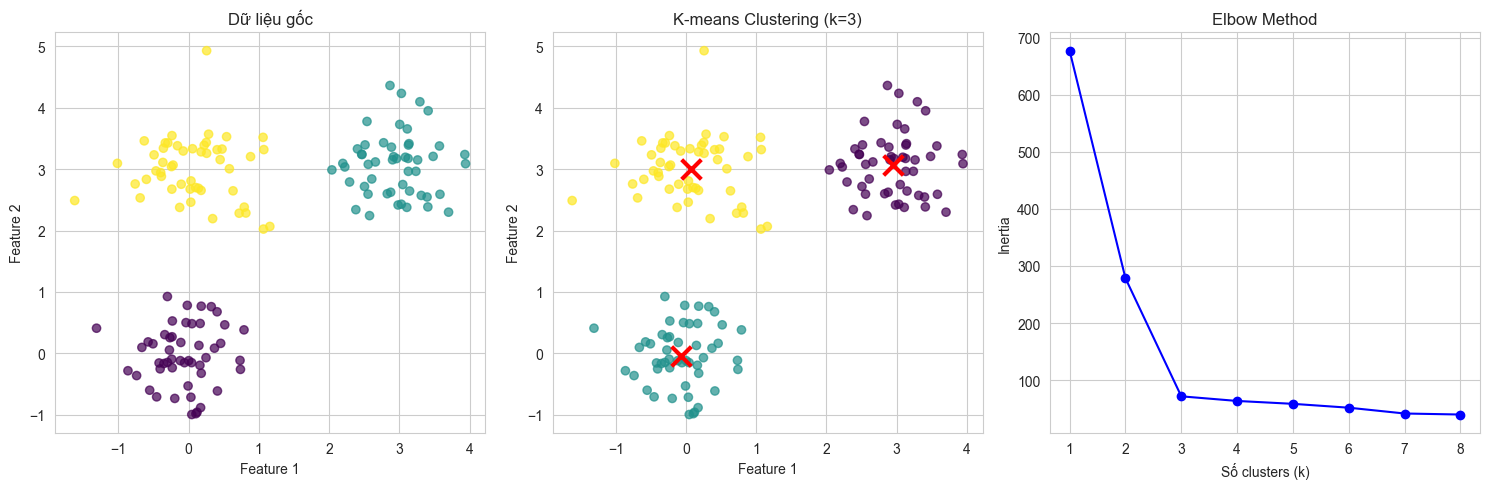

In [ ]:
class KMeansClustering:
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        self.inertia = None
    
    def _initialize_centroids(self, X):
        """Kh·ªüi t·∫°o centroids ng·∫´u nhi√™n"""
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        # Ch·ªçn k ƒëi·ªÉm ng·∫´u nhi√™n l√†m centroids ban ƒë·∫ßu
        random_indices = np.random.choice(n_samples, self.k, replace=False)
        centroids = X[random_indices]
        
        return centroids
    
    def _assign_clusters(self, X, centroids):
        """G√°n m·ªói ƒëi·ªÉm v√†o cluster g·∫ßn nh·∫•t"""
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        return labels
    
    def _update_centroids(self, X, labels):
        """C·∫≠p nh·∫≠t centroids"""
        centroids = np.zeros((self.k, X.shape[1]))
        
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)
        
        return centroids
    
    def _calculate_inertia(self, X, labels, centroids):
        """T√≠nh inertia (t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch)"""
        inertia = 0
        for i in range(self.k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                distances = np.sum((cluster_points - centroids[i])**2, axis=1)
                inertia += np.sum(distances)
        
        return inertia
    
    def fit(self, X):
        """Hu·∫•n luy·ªán m√¥ h√¨nh K-means"""
        # Kh·ªüi t·∫°o centroids
        self.centroids = self._initialize_centroids(X)
        
        for iteration in range(self.max_iters):
            # G√°n clusters
            old_labels = self.labels
            self.labels = self._assign_clusters(X, self.centroids)
            
            # C·∫≠p nh·∫≠t centroids
            old_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X, self.labels)
            
            # Ki·ªÉm tra convergence
            if old_labels is not None:
                centroid_shift = np.sum(np.sqrt(np.sum((self.centroids - old_centroids)**2, axis=1)))
                if centroid_shift < self.tol:
                    break
        
        # T√≠nh inertia cu·ªëi c√πng
        self.inertia = self._calculate_inertia(X, self.labels, self.centroids)
        
        return self
    
    def predict(self, X):
        """D·ª± ƒëo√°n cluster cho d·ªØ li·ªáu m·ªõi"""
        if self.centroids is None:
            raise ValueError("Model ch∆∞a ƒë∆∞·ª£c hu·∫•n luy·ªán. G·ªçi fit() tr∆∞·ªõc.")
        
        labels = self._assign_clusters(X, self.centroids)
        return labels
    
    def fit_predict(self, X):
        """Hu·∫•n luy·ªán v√† d·ª± ƒëo√°n trong m·ªôt l·∫ßn"""
        self.fit(X)
        return self.labels
    
    def get_centroids(self):
        """L·∫•y centroids"""
        return self.centroids
    
    def get_inertia(self):
        """L·∫•y inertia"""
        return self.inertia
    
    def print_results(self):
        """In k·∫øt qu·∫£ clustering"""
        print("=== K-MEANS CLUSTERING RESULTS ===")
        print(f"S·ªë clusters: {self.k}")
        print(f"Inertia: {self.inertia:.3f}")
        print(f"Centroids:")
        for i, centroid in enumerate(self.centroids):
            print(f"  Cluster {i}: {centroid}")

# H√†m t√≠nh Elbow Method ƒë·ªÉ ch·ªçn k t·ªët nh·∫•t
def calculate_elbow_method(X, max_k=10):
    """T√≠nh inertia cho c√°c gi√° tr·ªã k kh√°c nhau"""
    inertias = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeansClustering(k=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.get_inertia())
    
    return k_values, inertias

# T·∫°o dataset demo cho K-means
def create_demo_kmeans_data():
    """T·∫°o dataset demo cho K-means"""
    # T·∫°o d·ªØ li·ªáu v·ªõi 3 clusters r√µ r√†ng
    np.random.seed(42)
    
    # Cluster 1: trung t√¢m (0, 0)
    cluster1 = np.random.normal(0, 0.5, (50, 2))
    
    # Cluster 2: trung t√¢m (3, 3)
    cluster2 = np.random.normal(3, 0.5, (50, 2))
    
    # Cluster 3: trung t√¢m (0, 3)
    cluster3 = np.random.normal([0, 3], 0.5, (50, 2))
    
    # K·∫øt h·ª£p d·ªØ li·ªáu
    X = np.vstack([cluster1, cluster2, cluster3])
    true_labels = np.hstack([np.zeros(50), np.ones(50), np.full(50, 2)])
    
    return X, true_labels

# Demo K-means
print("=== DEMO K-MEANS CLUSTERING ===")
X, true_labels = create_demo_kmeans_data()

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi k=3
kmeans = KMeansClustering(k=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# In k·∫øt qu·∫£
kmeans.print_results()

# T√≠nh Elbow Method
print("\n=== ELBOW METHOD ===")
k_values, inertias = calculate_elbow_method(X, max_k=8)

print("K\tInertia")
for k, inertia in zip(k_values, inertias):
    print(f"{k}\t{inertia:.3f}")

# Visualization
plt.figure(figsize=(15, 5))

# Plot 1: D·ªØ li·ªáu g·ªëc
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
plt.title('D·ªØ li·ªáu g·ªëc')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 2: K-means clustering
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
           c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot 3: Elbow Method
plt.subplot(1, 3, 3)
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('S·ªë clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)

plt.tight_layout()
plt.show()


## Giao Di·ªán T∆∞∆°ng T√°c

Ph·∫ßn n√†y cung c·∫•p giao di·ªán t∆∞∆°ng t√°c ƒë·ªÉ b·∫°n c√≥ th·ªÉ th·ª≠ nghi·ªám c√°c thu·∫≠t to√°n v·ªõi c√°c tham s·ªë kh√°c nhau.


In [ ]:
# Giao di·ªán t∆∞∆°ng t√°c cho c√°c thu·∫≠t to√°n
def create_interactive_dashboard():
    """T·∫°o dashboard t∆∞∆°ng t√°c cho t·∫•t c·∫£ thu·∫≠t to√°n"""
    
    # Widgets cho Apriori
    apriori_support = widgets.FloatSlider(
        value=0.3,
        min=0.1,
        max=0.8,
        step=0.1,
        description='Min Support:',
        style={'description_width': 'initial'}
    )
    
    apriori_confidence = widgets.FloatSlider(
        value=0.6,
        min=0.1,
        max=0.9,
        step=0.1,
        description='Min Confidence:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho Naive Bayes
    nb_test_size = widgets.FloatSlider(
        value=0.3,
        min=0.1,
        max=0.5,
        step=0.1,
        description='Test Size:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho Decision Trees
    tree_max_depth = widgets.IntSlider(
        value=3,
        min=1,
        max=10,
        step=1,
        description='Max Depth:',
        style={'description_width': 'initial'}
    )
    
    tree_min_samples = widgets.IntSlider(
        value=5,
        min=1,
        max=20,
        step=1,
        description='Min Samples Split:',
        style={'description_width': 'initial'}
    )
    
    # Widgets cho K-means
    kmeans_k = widgets.IntSlider(
        value=3,
        min=2,
        max=8,
        step=1,
        description='Number of Clusters:',
        style={'description_width': 'initial'}
    )
    
    # Dropdown ƒë·ªÉ ch·ªçn thu·∫≠t to√°n
    algorithm_selector = widgets.Dropdown(
        options=[
            ('Apriori', 'apriori'),
            ('Naive Bayes', 'naive_bayes'),
            ('Decision Tree C4.5', 'c45'),
            ('Decision Tree ID3', 'id3'),
            ('Decision Tree CART', 'cart'),
            ('K-means', 'kmeans')
        ],
        value='apriori',
        description='Ch·ªçn thu·∫≠t to√°n:',
        style={'description_width': 'initial'}
    )
    
    # Button ƒë·ªÉ ch·∫°y thu·∫≠t to√°n
    run_button = widgets.Button(
        description='Ch·∫°y Thu·∫≠t To√°n',
        button_style='success',
        icon='play'
    )
    
    # Output widget
    output = widgets.Output()
    
    def on_run_clicked(b):
        with output:
            clear_output(wait=True)
            
            if algorithm_selector.value == 'apriori':
                print("=== APRIORI INTERACTIVE DEMO ===")
                transactions = create_demo_transactions()
                apriori = AprioriAlgorithm(
                    min_support=apriori_support.value,
                    min_confidence=apriori_confidence.value
                )
                apriori.find_frequent_itemsets(transactions)
                apriori.generate_association_rules()
                apriori.print_results()
                
            elif algorithm_selector.value == 'naive_bayes':
                print("=== NAIVE BAYES INTERACTIVE DEMO ===")
                X, y = create_demo_naive_bayes_data()
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=nb_test_size.value, random_state=42
                )
                
                nb_classifier = NaiveBayesClassifier()
                nb_classifier.fit(X_train, y_train)
                y_pred = nb_classifier.predict(X_test)
                accuracy = nb_classifier.score(X_test, y_test)
                
                print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
                print("\nClassification Report:")
                print(classification_report(y_test, y_pred))
                
            elif algorithm_selector.value == 'c45':
                print("=== DECISION TREE C4.5 INTERACTIVE DEMO ===")
                X, y = create_demo_c45_data()
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=42
                )
                
                c45_tree = DecisionTreeC45(
                    min_samples_split=tree_min_samples.value,
                    max_depth=tree_max_depth.value
                )
                c45_tree.fit(X_train, y_train)
                y_pred = c45_tree.predict(X_test)
                accuracy = c45_tree.score(X_test, y_test)
                
                print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
                print("\nC√¢y quy·∫øt ƒë·ªãnh:")
                c45_tree.print_tree()
                
            elif algorithm_selector.value == 'id3':
                print("=== DECISION TREE ID3 INTERACTIVE DEMO ===")
                X, y, le_dict = create_demo_id3_data()
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=42
                )
                
                id3_tree = DecisionTreeID3()
                feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
                id3_tree.fit(X_train, y_train, feature_names)
                y_pred = id3_tree.predict(X_test)
                accuracy = id3_tree.score(X_test, y_test)
                
                print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
                print("\nC√¢y quy·∫øt ƒë·ªãnh:")
                id3_tree.print_tree()
                
            elif algorithm_selector.value == 'cart':
                print("=== DECISION TREE CART INTERACTIVE DEMO ===")
                X, y = create_demo_cart_data()
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=42
                )
                
                cart_tree = DecisionTreeCART(
                    min_samples_split=tree_min_samples.value,
                    max_depth=tree_max_depth.value
                )
                cart_tree.fit(X_train, y_train)
                y_pred = cart_tree.predict(X_test)
                accuracy = cart_tree.score(X_test, y_test)
                
                print(f"ƒê·ªô ch√≠nh x√°c: {accuracy:.3f}")
                print("\nC√¢y quy·∫øt ƒë·ªãnh:")
                cart_tree.print_tree()
                
            elif algorithm_selector.value == 'kmeans':
                print("=== K-MEANS INTERACTIVE DEMO ===")
                X, true_labels = create_demo_kmeans_data()
                
                kmeans = KMeansClustering(k=kmeans_k.value, random_state=42)
                predicted_labels = kmeans.fit_predict(X)
                
                kmeans.print_results()
                
                # Visualization
                plt.figure(figsize=(12, 5))
                
                plt.subplot(1, 2, 1)
                plt.scatter(X[:, 0], X[:, 1], c=true_labels, cmap='viridis', alpha=0.7)
                plt.title('D·ªØ li·ªáu g·ªëc')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                
                plt.subplot(1, 2, 2)
                plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
                plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
                           c='red', marker='x', s=200, linewidths=3)
                plt.title(f'K-means Clustering (k={kmeans_k.value})')
                plt.xlabel('Feature 1')
                plt.ylabel('Feature 2')
                
                plt.tight_layout()
                plt.show()
    
    run_button.on_click(on_run_clicked)
    
    # Layout
    controls = widgets.VBox([
        algorithm_selector,
        widgets.HTML("<h3>Tham s·ªë:</h3>"),
        apriori_support,
        apriori_confidence,
        nb_test_size,
        tree_max_depth,
        tree_min_samples,
        kmeans_k,
        run_button
    ])
    
    dashboard = widgets.HBox([controls, output])
    
    return dashboard

# T·∫°o dashboard
print("=== DASHBOARD T∆Ø∆†NG T√ÅC ===")
dashboard = create_interactive_dashboard()
display(dashboard)


=== DASHBOARD T∆Ø∆†NG T√ÅC ===


## T·ªïng K·∫øt v√† H∆∞·ªõng D·∫´n S·ª≠ D·ª•ng

### C√°c Thu·∫≠t To√°n ƒê√£ Implement:

1. **Apriori Algorithm**
   - T√¨m frequent itemsets v√† association rules
   - Tham s·ªë: min_support, min_confidence
   - ·ª®ng d·ª•ng: Market basket analysis, recommendation systems

2. **Rough Set Reduction**
   - Gi·∫£m chi·ªÅu d·ªØ li·ªáu kh√¥ng m·∫•t th√¥ng tin
   - T√¨m reducts t·ªëi thi·ªÉu
   - ·ª®ng d·ª•ng: Feature selection, data preprocessing

3. **Naive Bayes Classifier**
   - Ph√¢n lo·∫°i d·ª±a tr√™n x√°c su·∫•t Bayes
   - Gi·∫£ ƒë·ªãnh ƒë·ªôc l·∫≠p gi·ªØa c√°c features
   - ·ª®ng d·ª•ng: Text classification, spam detection

4. **Decision Tree C4.5**
   - S·ª≠ d·ª•ng Information Gain Ratio
   - X·ª≠ l√Ω continuous v√† categorical data
   - ·ª®ng d·ª•ng: Classification, feature importance

5. **Decision Tree ID3**
   - S·ª≠ d·ª•ng Information Gain
   - Ch·ªâ x·ª≠ l√Ω categorical data
   - ·ª®ng d·ª•ng: Classification v·ªõi discrete features

6. **Decision Tree CART**
   - S·ª≠ d·ª•ng Gini Impurity
   - Binary trees, x·ª≠ l√Ω c·∫£ classification v√† regression
   - ·ª®ng d·ª•ng: General purpose classification/regression

7. **K-means Clustering**
   - Ph√¢n c·ª•m kh√¥ng gi√°m s√°t
   - Tham s·ªë: s·ªë clusters (k)
   - ·ª®ng d·ª•ng: Customer segmentation, image segmentation

### C√°ch S·ª≠ D·ª•ng:

1. **Ch·∫°y t·ª´ng cell** ƒë·ªÉ xem demo c·ªßa t·ª´ng thu·∫≠t to√°n
2. **S·ª≠ d·ª•ng Dashboard t∆∞∆°ng t√°c** ƒë·ªÉ thay ƒë·ªïi tham s·ªë v√† so s√°nh k·∫øt qu·∫£
3. **Thay ƒë·ªïi dataset** trong c√°c h√†m `create_demo_*_data()` ƒë·ªÉ th·ª≠ nghi·ªám v·ªõi d·ªØ li·ªáu kh√°c
4. **T√πy ch·ªânh tham s·ªë** trong c√°c class ƒë·ªÉ ph√π h·ª£p v·ªõi b√†i to√°n c·ª• th·ªÉ

### L∆∞u √ù:

- T·∫•t c·∫£ thu·∫≠t to√°n ƒë·ªÅu ƒë∆∞·ª£c implement t·ª´ ƒë·∫ßu ƒë·ªÉ hi·ªÉu r√µ c√°ch ho·∫°t ƒë·ªông
- C√≥ th·ªÉ s·ª≠ d·ª•ng sklearn ƒë·ªÉ so s√°nh k·∫øt qu·∫£
- Dataset demo ƒë∆∞·ª£c t·∫°o ng·∫´u nhi√™n v·ªõi seed c·ªë ƒë·ªãnh ƒë·ªÉ c√≥ th·ªÉ reproduce
- Giao di·ªán t∆∞∆°ng t√°c gi√∫p hi·ªÉu r√µ t√°c ƒë·ªông c·ªßa c√°c tham s·ªë

### M·ªü R·ªông:

- C√≥ th·ªÉ th√™m visualization cho c√°c thu·∫≠t to√°n kh√°c
- Implement th√™m c√°c thu·∫≠t to√°n nh∆∞ Random Forest, SVM
- Th√™m metrics ƒë√°nh gi√° chi ti·∫øt h∆°n
- T√≠ch h·ª£p v·ªõi real datasets


In [ ]:
# Cell cu·ªëi c√πng - T√≥m t·∫Øt v√† h∆∞·ªõng d·∫´n
print("üéâ HO√ÄN TH√ÄNH NOTEBOOK KHAI TH√ÅC D·ªÆ LI·ªÜU!")
print("\n" + "="*60)
print("üìö C√ÅC THU·∫¨T TO√ÅN ƒê√É IMPLEMENT:")
print("="*60)
print("1. ‚úÖ Apriori - Association Rule Learning")
print("2. ‚úÖ Rough Set Reduction - Dimensionality Reduction") 
print("3. ‚úÖ Naive Bayes - Probabilistic Classification")
print("4. ‚úÖ Decision Tree C4.5 - Information Gain Ratio")
print("5. ‚úÖ Decision Tree ID3 - Information Gain")
print("6. ‚úÖ Decision Tree CART - Gini Impurity")
print("7. ‚úÖ K-means - Unsupervised Clustering")
print("\n" + "="*60)
print("üéÆ T√çNH NƒÇNG:")
print("="*60)
print("‚Ä¢ Code Python implementation t·ª´ ƒë·∫ßu")
print("‚Ä¢ Dataset demo cho t·ª´ng thu·∫≠t to√°n")
print("‚Ä¢ Giao di·ªán t∆∞∆°ng t√°c v·ªõi widgets")
print("‚Ä¢ Visualization v√† k·∫øt qu·∫£ chi ti·∫øt")
print("‚Ä¢ H∆∞·ªõng d·∫´n s·ª≠ d·ª•ng v√† m·ªü r·ªông")
print("\n" + "="*60)
print("üöÄ C√ÅCH S·ª¨ D·ª§NG:")
print("="*60)
print("1. Ch·∫°y t·ª´ng cell ƒë·ªÉ xem demo")
print("2. S·ª≠ d·ª•ng Dashboard t∆∞∆°ng t√°c")
print("3. Thay ƒë·ªïi tham s·ªë v√† so s√°nh k·∫øt qu·∫£")
print("4. T√πy ch·ªânh dataset cho b√†i to√°n c·ª• th·ªÉ")
print("\n" + "="*60)
print("üí° L∆ØU √ù:")
print("="*60)
print("‚Ä¢ T·∫•t c·∫£ thu·∫≠t to√°n ƒë∆∞·ª£c implement t·ª´ ƒë·∫ßu")
print("‚Ä¢ C√≥ th·ªÉ so s√°nh v·ªõi sklearn")
print("‚Ä¢ Dataset c√≥ seed c·ªë ƒë·ªãnh ƒë·ªÉ reproduce")
print("‚Ä¢ Giao di·ªán gi√∫p hi·ªÉu t√°c ƒë·ªông c·ªßa tham s·ªë")
print("\nüéØ Ch√∫c b·∫°n h·ªçc t·∫≠p hi·ªáu qu·∫£!")


üéâ HO√ÄN TH√ÄNH NOTEBOOK KHAI TH√ÅC D·ªÆ LI·ªÜU!

üìö C√ÅC THU·∫¨T TO√ÅN ƒê√É IMPLEMENT:
1. ‚úÖ Apriori - Association Rule Learning
2. ‚úÖ Rough Set Reduction - Dimensionality Reduction
3. ‚úÖ Naive Bayes - Probabilistic Classification
4. ‚úÖ Decision Tree C4.5 - Information Gain Ratio
5. ‚úÖ Decision Tree ID3 - Information Gain
6. ‚úÖ Decision Tree CART - Gini Impurity
7. ‚úÖ K-means - Unsupervised Clustering

üéÆ T√çNH NƒÇNG:
‚Ä¢ Code Python implementation t·ª´ ƒë·∫ßu
‚Ä¢ Dataset demo cho t·ª´ng thu·∫≠t to√°n
‚Ä¢ Giao di·ªán t∆∞∆°ng t√°c v·ªõi widgets
‚Ä¢ Visualization v√† k·∫øt qu·∫£ chi ti·∫øt
‚Ä¢ H∆∞·ªõng d·∫´n s·ª≠ d·ª•ng v√† m·ªü r·ªông

üöÄ C√ÅCH S·ª¨ D·ª§NG:
1. Ch·∫°y t·ª´ng cell ƒë·ªÉ xem demo
2. S·ª≠ d·ª•ng Dashboard t∆∞∆°ng t√°c
3. Thay ƒë·ªïi tham s·ªë v√† so s√°nh k·∫øt qu·∫£
4. T√πy ch·ªânh dataset cho b√†i to√°n c·ª• th·ªÉ

üí° L∆ØU √ù:
‚Ä¢ T·∫•t c·∫£ thu·∫≠t to√°n ƒë∆∞·ª£c implement t·ª´ ƒë·∫ßu
‚Ä¢ C√≥ th·ªÉ so s√°nh v·ªõi sklearn
‚Ä¢ Dataset c√≥ seed c·ªë ƒë·ªãn